# <span style="color:blue">Projected Changes in the Hydrological Ccle Individual Notebook 
## <span style="color:blue"> Investigating Climate Change in Earth's Polar Regions
In this notebook, we will explore the question, "Is it true that 'wet gets wetter, dry gets drier?'" Projected changes using datasets from Google's CMIP6 computer can be analyzed to model future changes in the hydrologic cycle with the increase of CO2 emissions. We will explore SSP-585, which is a "buisness as usual" scenario where projected carbon emissions follow a projected increase relative to our current output, and we will also analyze SSP-126, which is a carbon emissions scenario where there is less concentration on economic growth and instead focuses on reducing emissions and creating a more sustainable society. 
##### Author: Jaclyn Bihl 
##### Contact: tuq41877@temple.edu

## Datasets
The CMIP6 data stored in the Google Cloud Storage are derived from the original CMIP6 data files distributed via the Earth System Grid Federation (ESGF) (https://esgf-node.llnl.gov/projects/cmip6/).The CMIP6 hosted on Google Cloud are maintained by the Climate Data Science Lab at Lamont Doherty Earth Observatory (LDEO) of Columbia University, as part of the Pangeo Project.

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import zarr  # to read in Zarr format
import gcsfs # to read google cloud data
import momlevel as ml
import cftime
import cmocean
import wocemaps
import cartopy.crs as ccrs


In [5]:
xr.set_options(display_style='html')
%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6  

In [6]:
google_cloud_cmip6 = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')

In [7]:
# this only needs to be created once per Jupyter session
gcs = gcsfs.GCSFileSystem(token='anon')

##### What is Salinity and Evaporation?
Salinity: The amount of dissolved salts in water, measured in percentage.

Evaporation: What occurs when a liquid turns into a gas It is measured in (kg/m²s), which is kilograms per meters squared per second.

## Sea Surface Salinity ssp126

In [8]:
sos_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'sos' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)

In [9]:
sos_zarr = sos_data.zstore.values[-1]

In [10]:
# create a mutable-mapping-style interface to the store
mapper_sos = gcs.get_mapper(sos_zarr)
# open the dataset using xarray and zarr
gfdl_esm4_sos_126 = xr.open_zarr(mapper_sos, 
                                consolidated=True,use_cftime=True).sos.rename({'lat':'latitude',
                                                             'lon':'longitude'})

## SSP126 Salinity Graphs

In [11]:
baseline_salinity_first_years = gfdl_esm4_sos_126.sel(time=slice('2015-01-16', '2035-01-01')).mean(dim='time')
baseline_salinity_last_years = gfdl_esm4_sos_126.sel(time=slice('2080-12-16', '2100-12-16')).mean(dim='time')

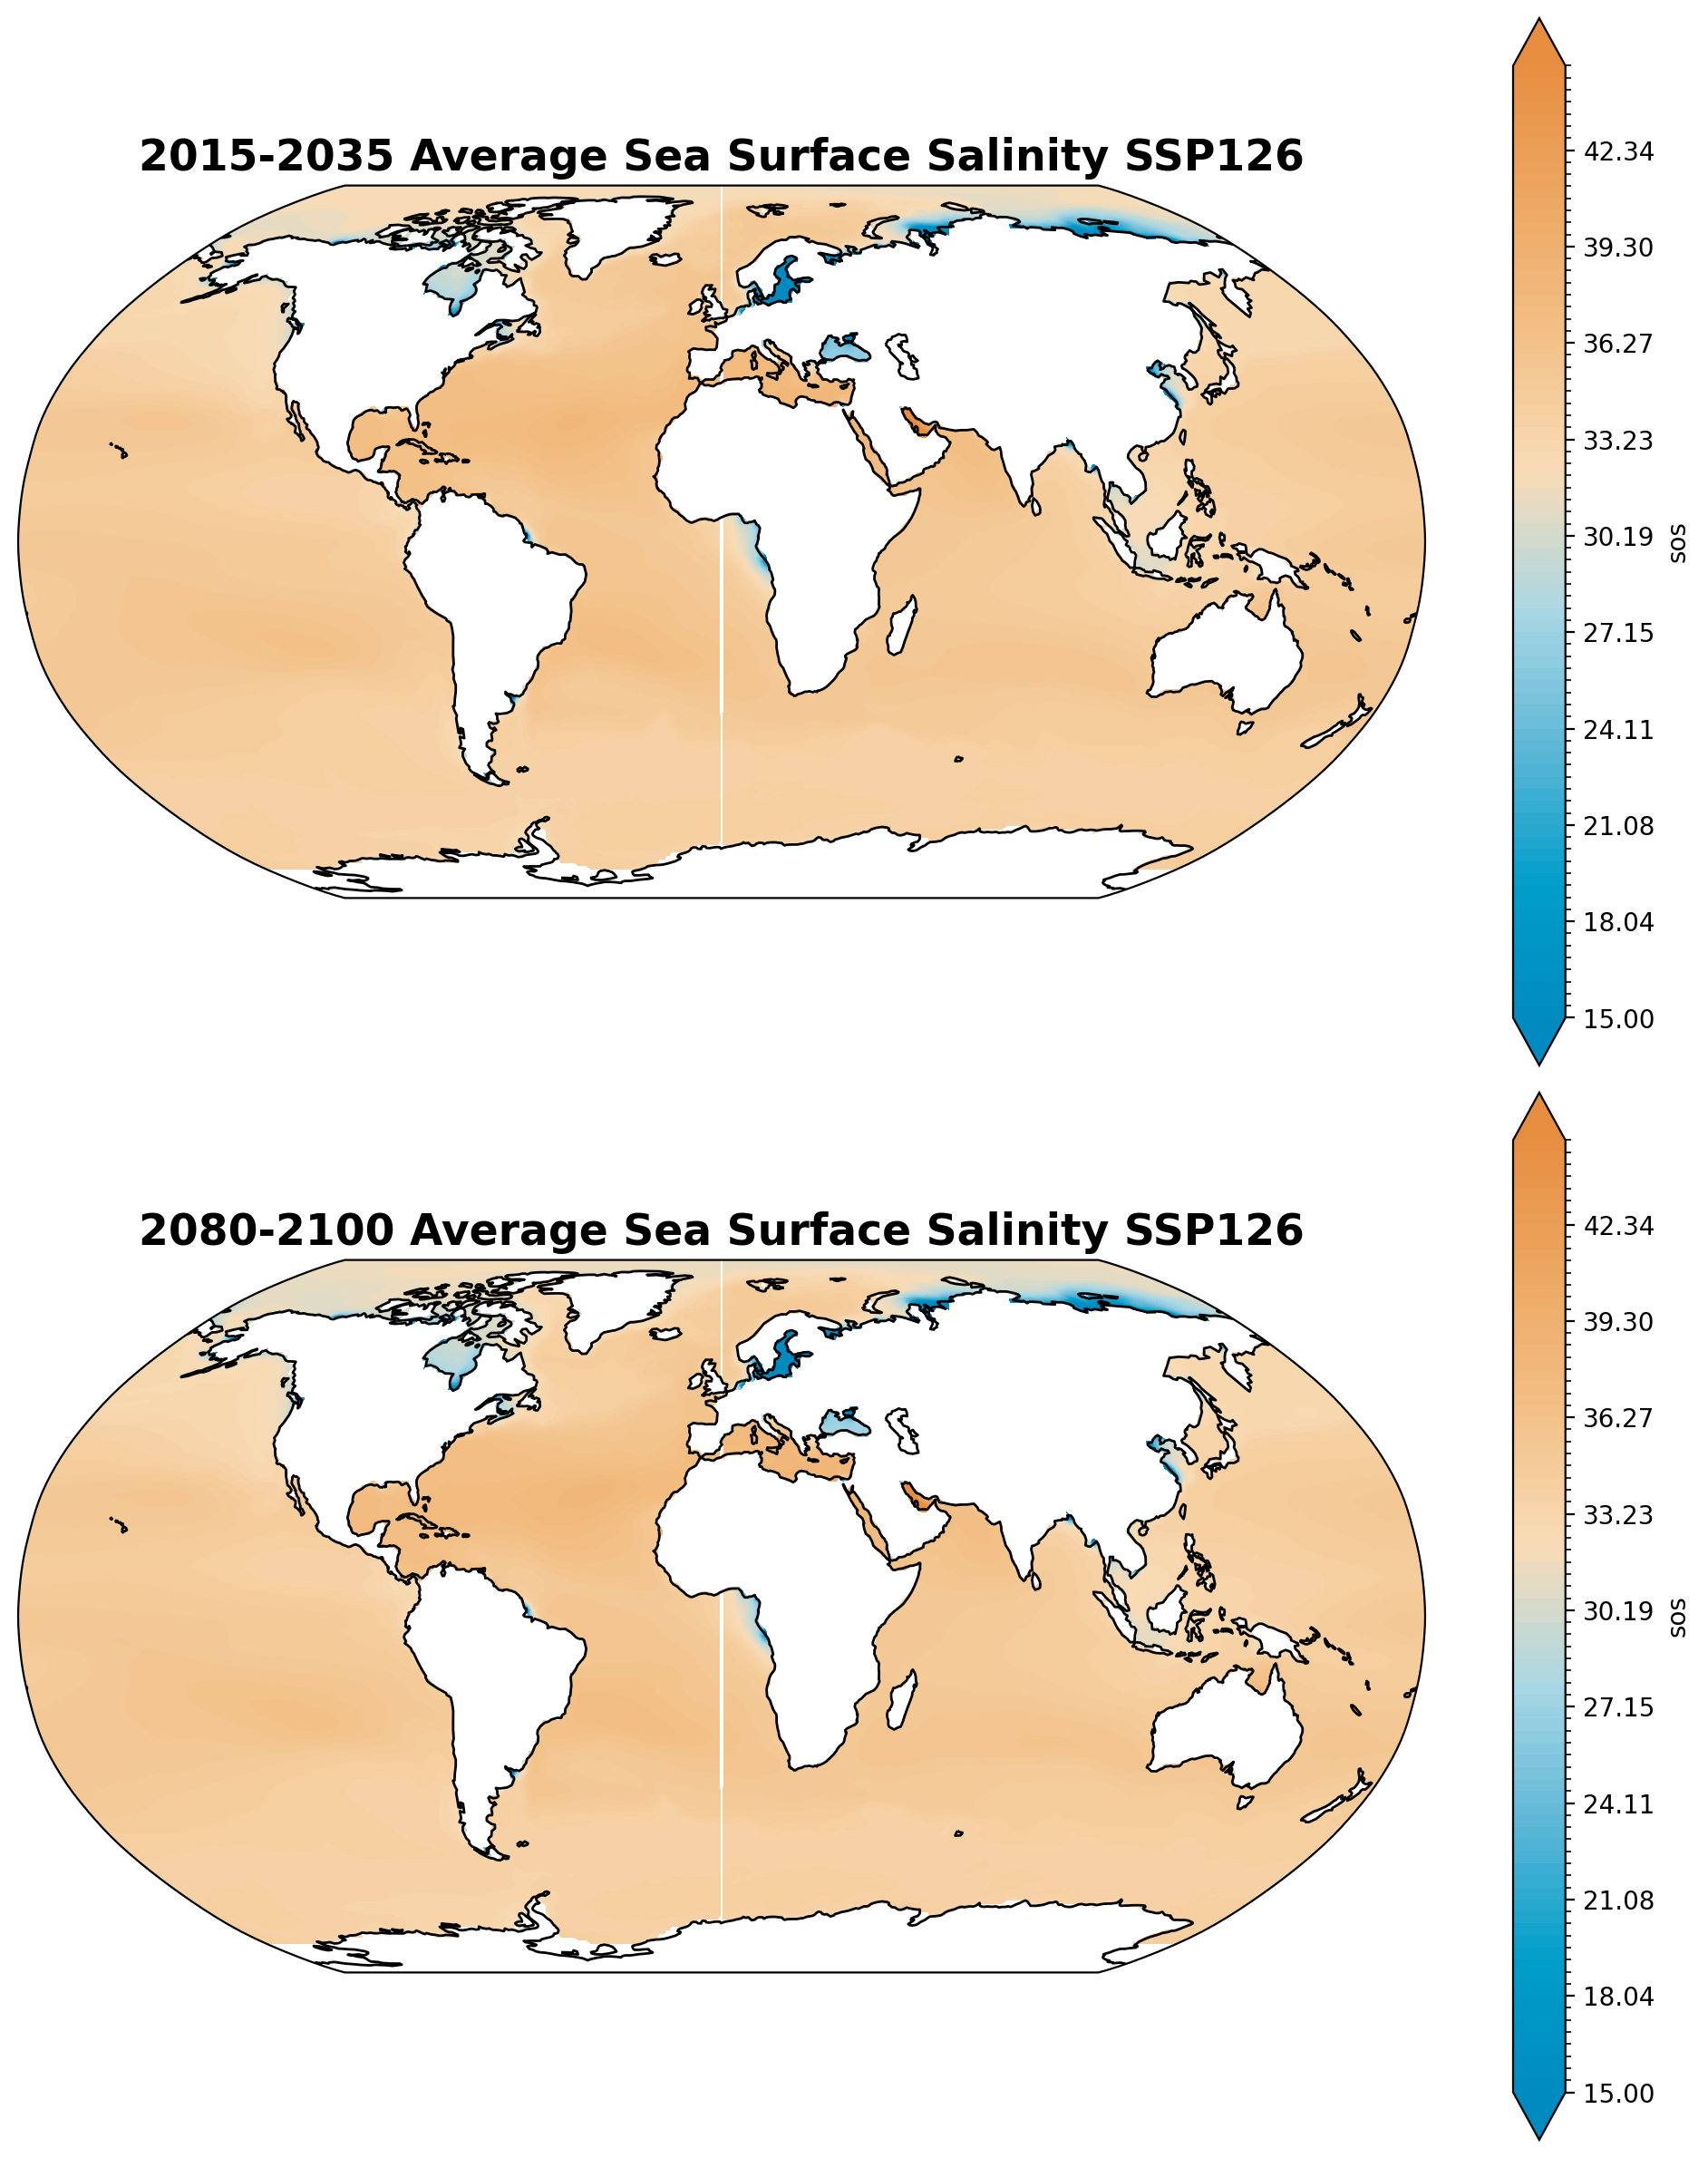

In [12]:
subplot_kws=dict(projection=ccrs.Robinson())

### set up our figure settings
fig, (ax1,ax2) = plt.subplots(ncols=1,
                               nrows=2,
                               figsize=(10,12),
                               subplot_kw=subplot_kws) ## set up our plotting area

### plot our data
baseline_salinity_first_years.plot.contourf(ax=ax1, cmap=wocemaps.salinity, levels=80, vmin=15, vmax=45, extend='both',
                                transform=ccrs.PlateCarree())
baseline_salinity_last_years.plot.contourf(ax=ax2, cmap=wocemaps.salinity, levels=80, vmin=15, vmax=45, extend='both',
                                transform=ccrs.PlateCarree())


## customize our subplots
ax1.set_title("2015-2035 Average Sea Surface Salinity SSP126", fontweight='bold', fontsize=17)
ax2.set_title('2080-2100 Average Sea Surface Salinity SSP126', fontweight='bold', fontsize=17)

ax1.set_ylabel('Latitude', fontsize = 15)
ax1.set_xlabel('Longitude', fontsize = 15)

ax2.set_ylabel('Latitude', fontsize = 15)
ax2.set_xlabel('Longitude', fontsize = 15)

plt.tight_layout() ## make it look nicely spaced!

### add some coastlines
ax1.coastlines()
ax2.coastlines()



__Figure 1.__ 2015-2035 Global Average Sea Surface Salinity from scenario SSP126 (top graph), 2080-2100 Global Average Sea Surface Salinity (bottom graph)

Sea surface salinity is directly affected by temperature and the overall water cycle of the earth. In this scenario, emissions don't increase substantially, but level off and plateau from the current value. These graphs show how levels of salinity increase by a very minute amount. This is because global warming patterns increase evaporation and concentrates water in the North Atlantic because currents combined with trade winds carry moisture to the Pacific. 

In [13]:
baseline_difference = baseline_salinity_last_years - baseline_salinity_first_years

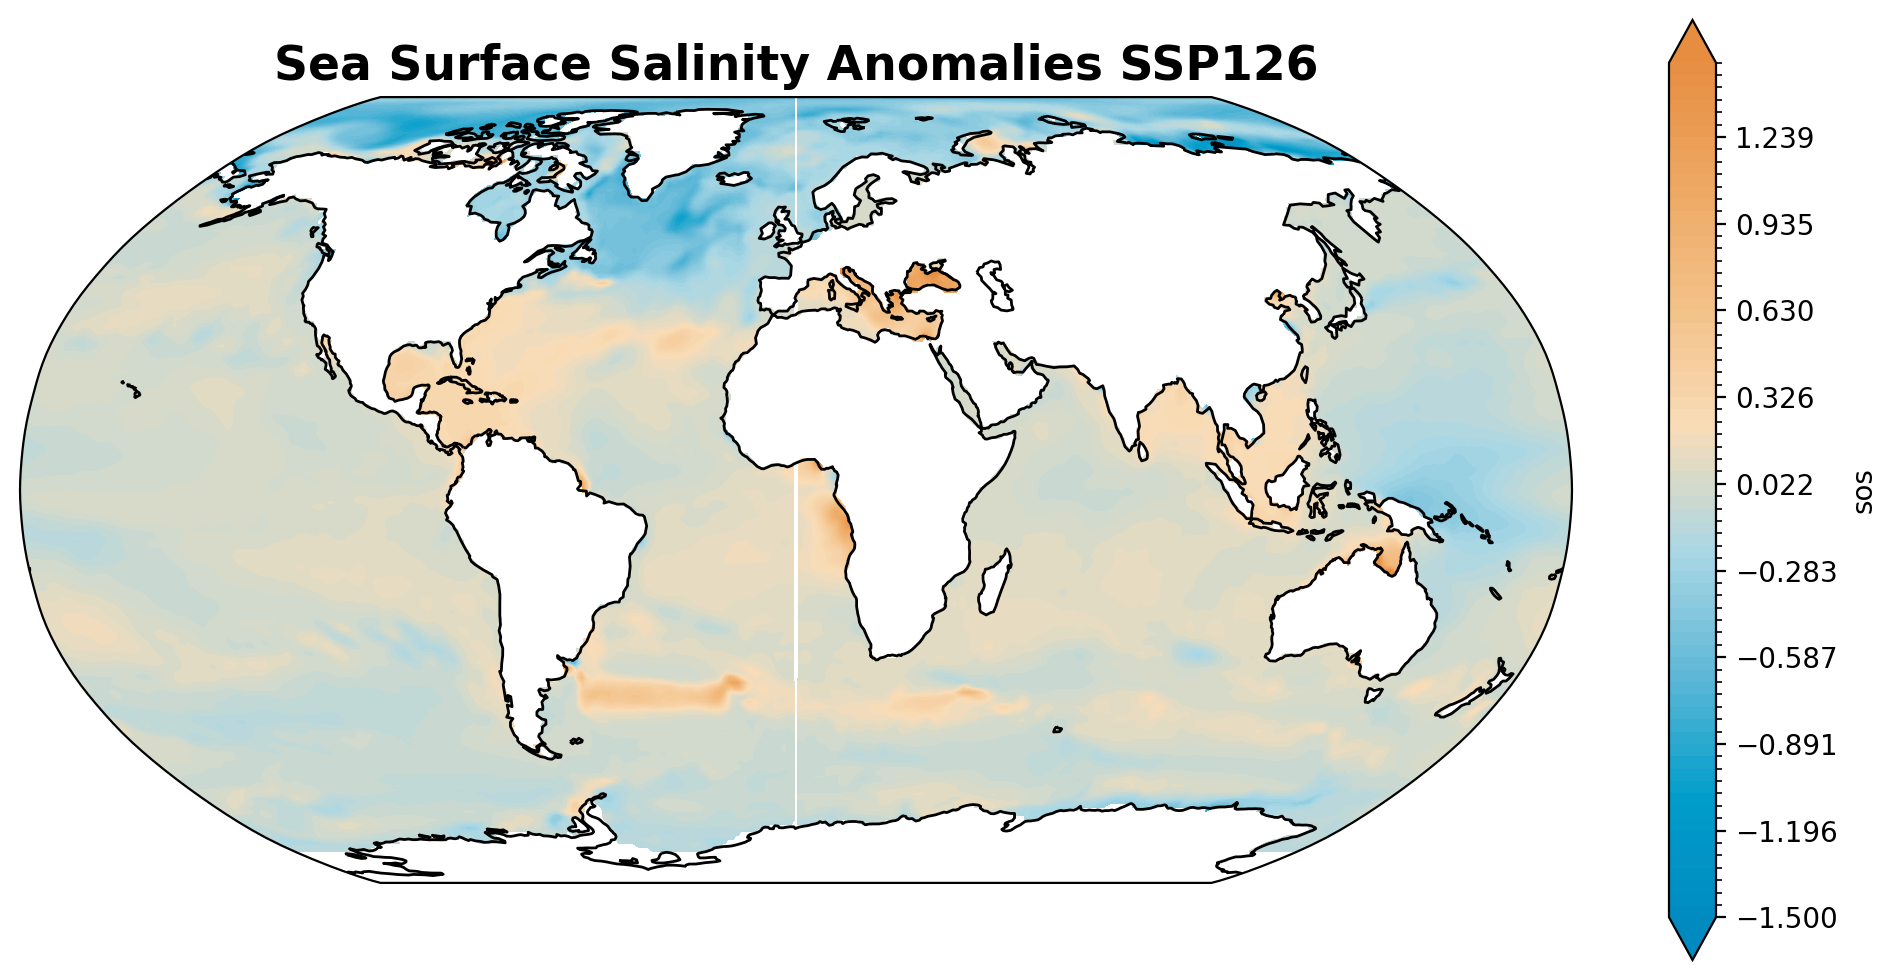

In [14]:
subplot_kws=dict(projection=ccrs.Robinson())

### set up our figure settings
fig, (ax1) = plt.subplots(ncols=1,
                               nrows=1,
                               figsize=(10,5),
                               subplot_kw=subplot_kws) ## set up our plotting area

### plot our data
baseline_difference.plot.contourf(ax=ax1, cmap=wocemaps.salinity, vmin=-1.5, vmax=1.5, levels=70, extend='both',
                                transform=ccrs.PlateCarree())

## customize our subplots
ax1.set_title("Sea Surface Salinity Anomalies SSP126", fontweight='bold', fontsize=17)

plt.tight_layout() ## make it look nicely spaced!

### add some coastlines
ax1.coastlines()



__Figure 2.__ Global Average Sea Surface Salinity Anomalies from scenario SSP126.

The baseline differences from the first dataset from the beginning of the time period (2015-2035) are subtracted from the last 20 year period (2080-2100) to create a graph showing the change in salinity. The salinity levels increase around the equator and decrease around the poles, due to moisture being carried from subtropical zones and towards the poles, combined with trade winds to decrease the salinity in those areas. 

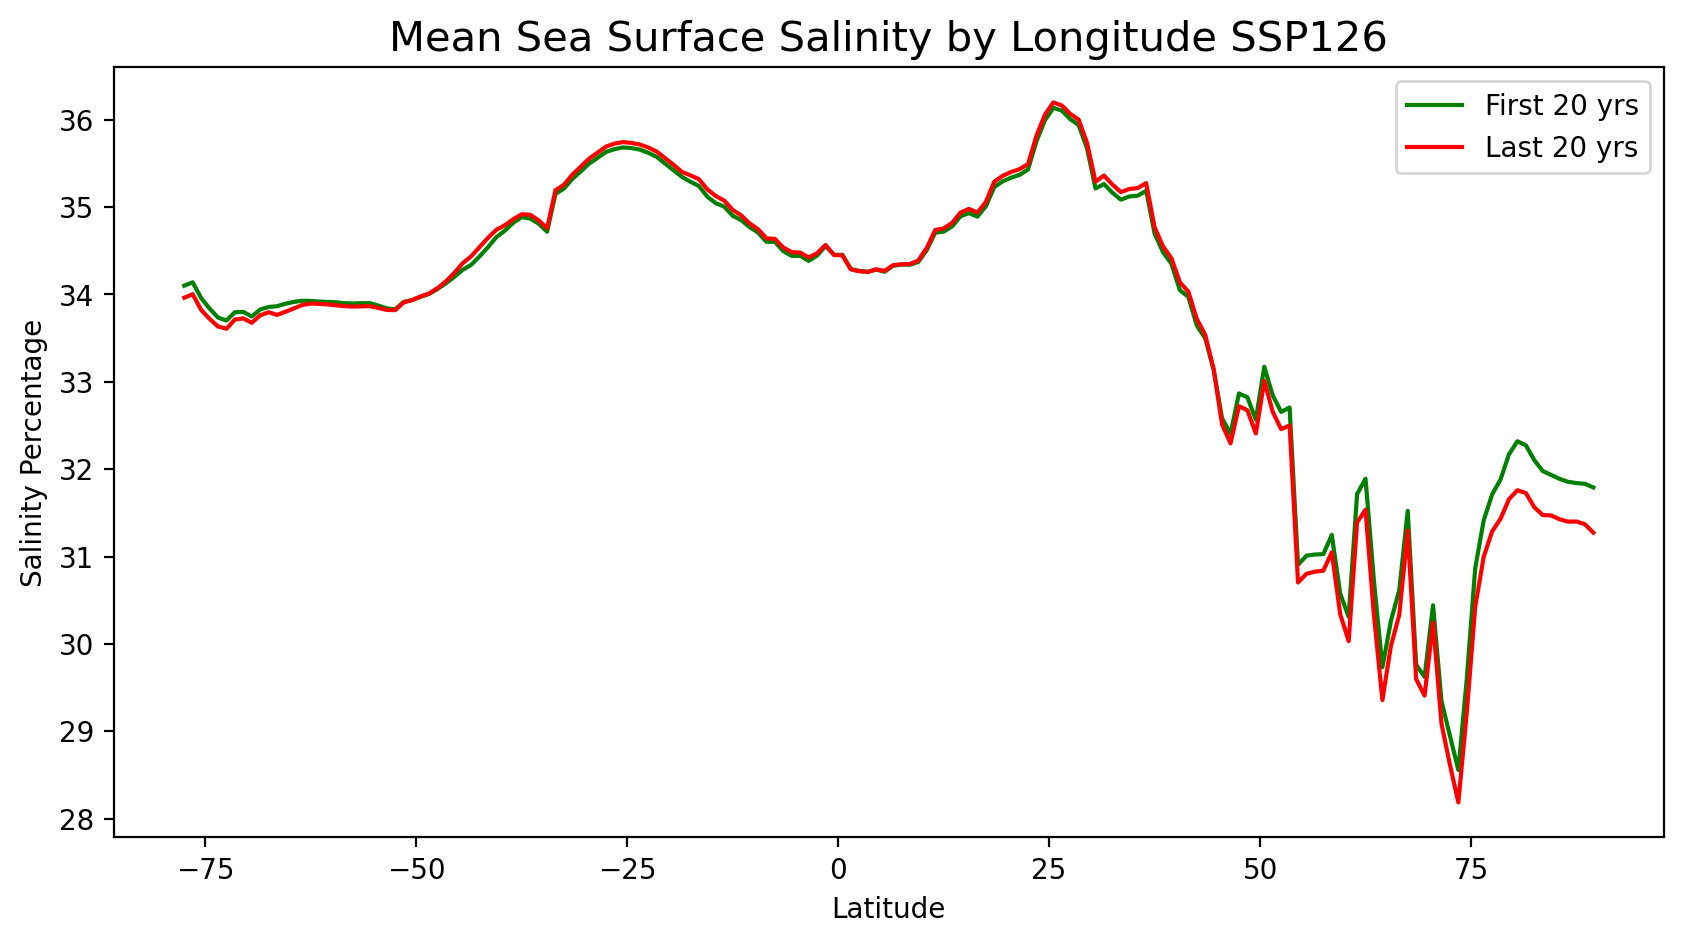

In [15]:
fig, ax = plt.subplots(figsize = (10,5))
avg_first_yearsos_126 = baseline_salinity_first_years.mean(dim = 'longitude').plot(color = 'green', label='First 20 yrs')
avg_last_yearsos_126 = baseline_salinity_last_years.mean(dim = 'longitude').plot(color = 'red', label='Last 20 yrs')
ax.set_title('Mean Sea Surface Salinity by Longitude SSP126', fontsize = 15)
ax.set_xlabel('Latitude')
ax.set_ylabel("Salinity Percentage")
ax.legend()

__Figure 3.__ Longitudinal Global Average Sea Surface Salinity from scenario SSP126

Increased carbon emissions coincide with decreased sea ice concentration in the north and south poles, and therefore pushing more freshwater into the ocean which can decrease the salinity. Since the south pole has less land mass and therefore more sea ice, it has a higher salinity due to the sea ice expelling salt into the water when it freezes. This could be the cause for higher salinity levels in the south pole and lower salinity in the north pole.

# Sea Surface Salinity ssp585

In [16]:
sos_ssp585_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'sos' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)
sos_585_zarr = sos_data.zstore.values[-1]
# create a mutable-mapping-style interface to the store
mapper_585_sos = gcs.get_mapper(sos_585_zarr)
# open the dataset using xarray and zarr
gfdl_esm4_585_sos = xr.open_zarr(mapper_585_sos, 
                                consolidated=True,use_cftime=True).sos.rename({'lat':'latitude',
                                                             'lon':'longitude'})

## SSP585 Salinity Graphs

In [17]:
baseline_salinity_first_years_585 = gfdl_esm4_585_sos.sel(time=slice('2015-01-16', '2035-01-01')).mean(dim='time')
baseline_salinity_last_years_585 = gfdl_esm4_585_sos.sel(time=slice('2080-12-16', '2100-12-16')).mean(dim='time')
baseline_difference_585 = baseline_salinity_last_years_585 - baseline_salinity_first_years_585

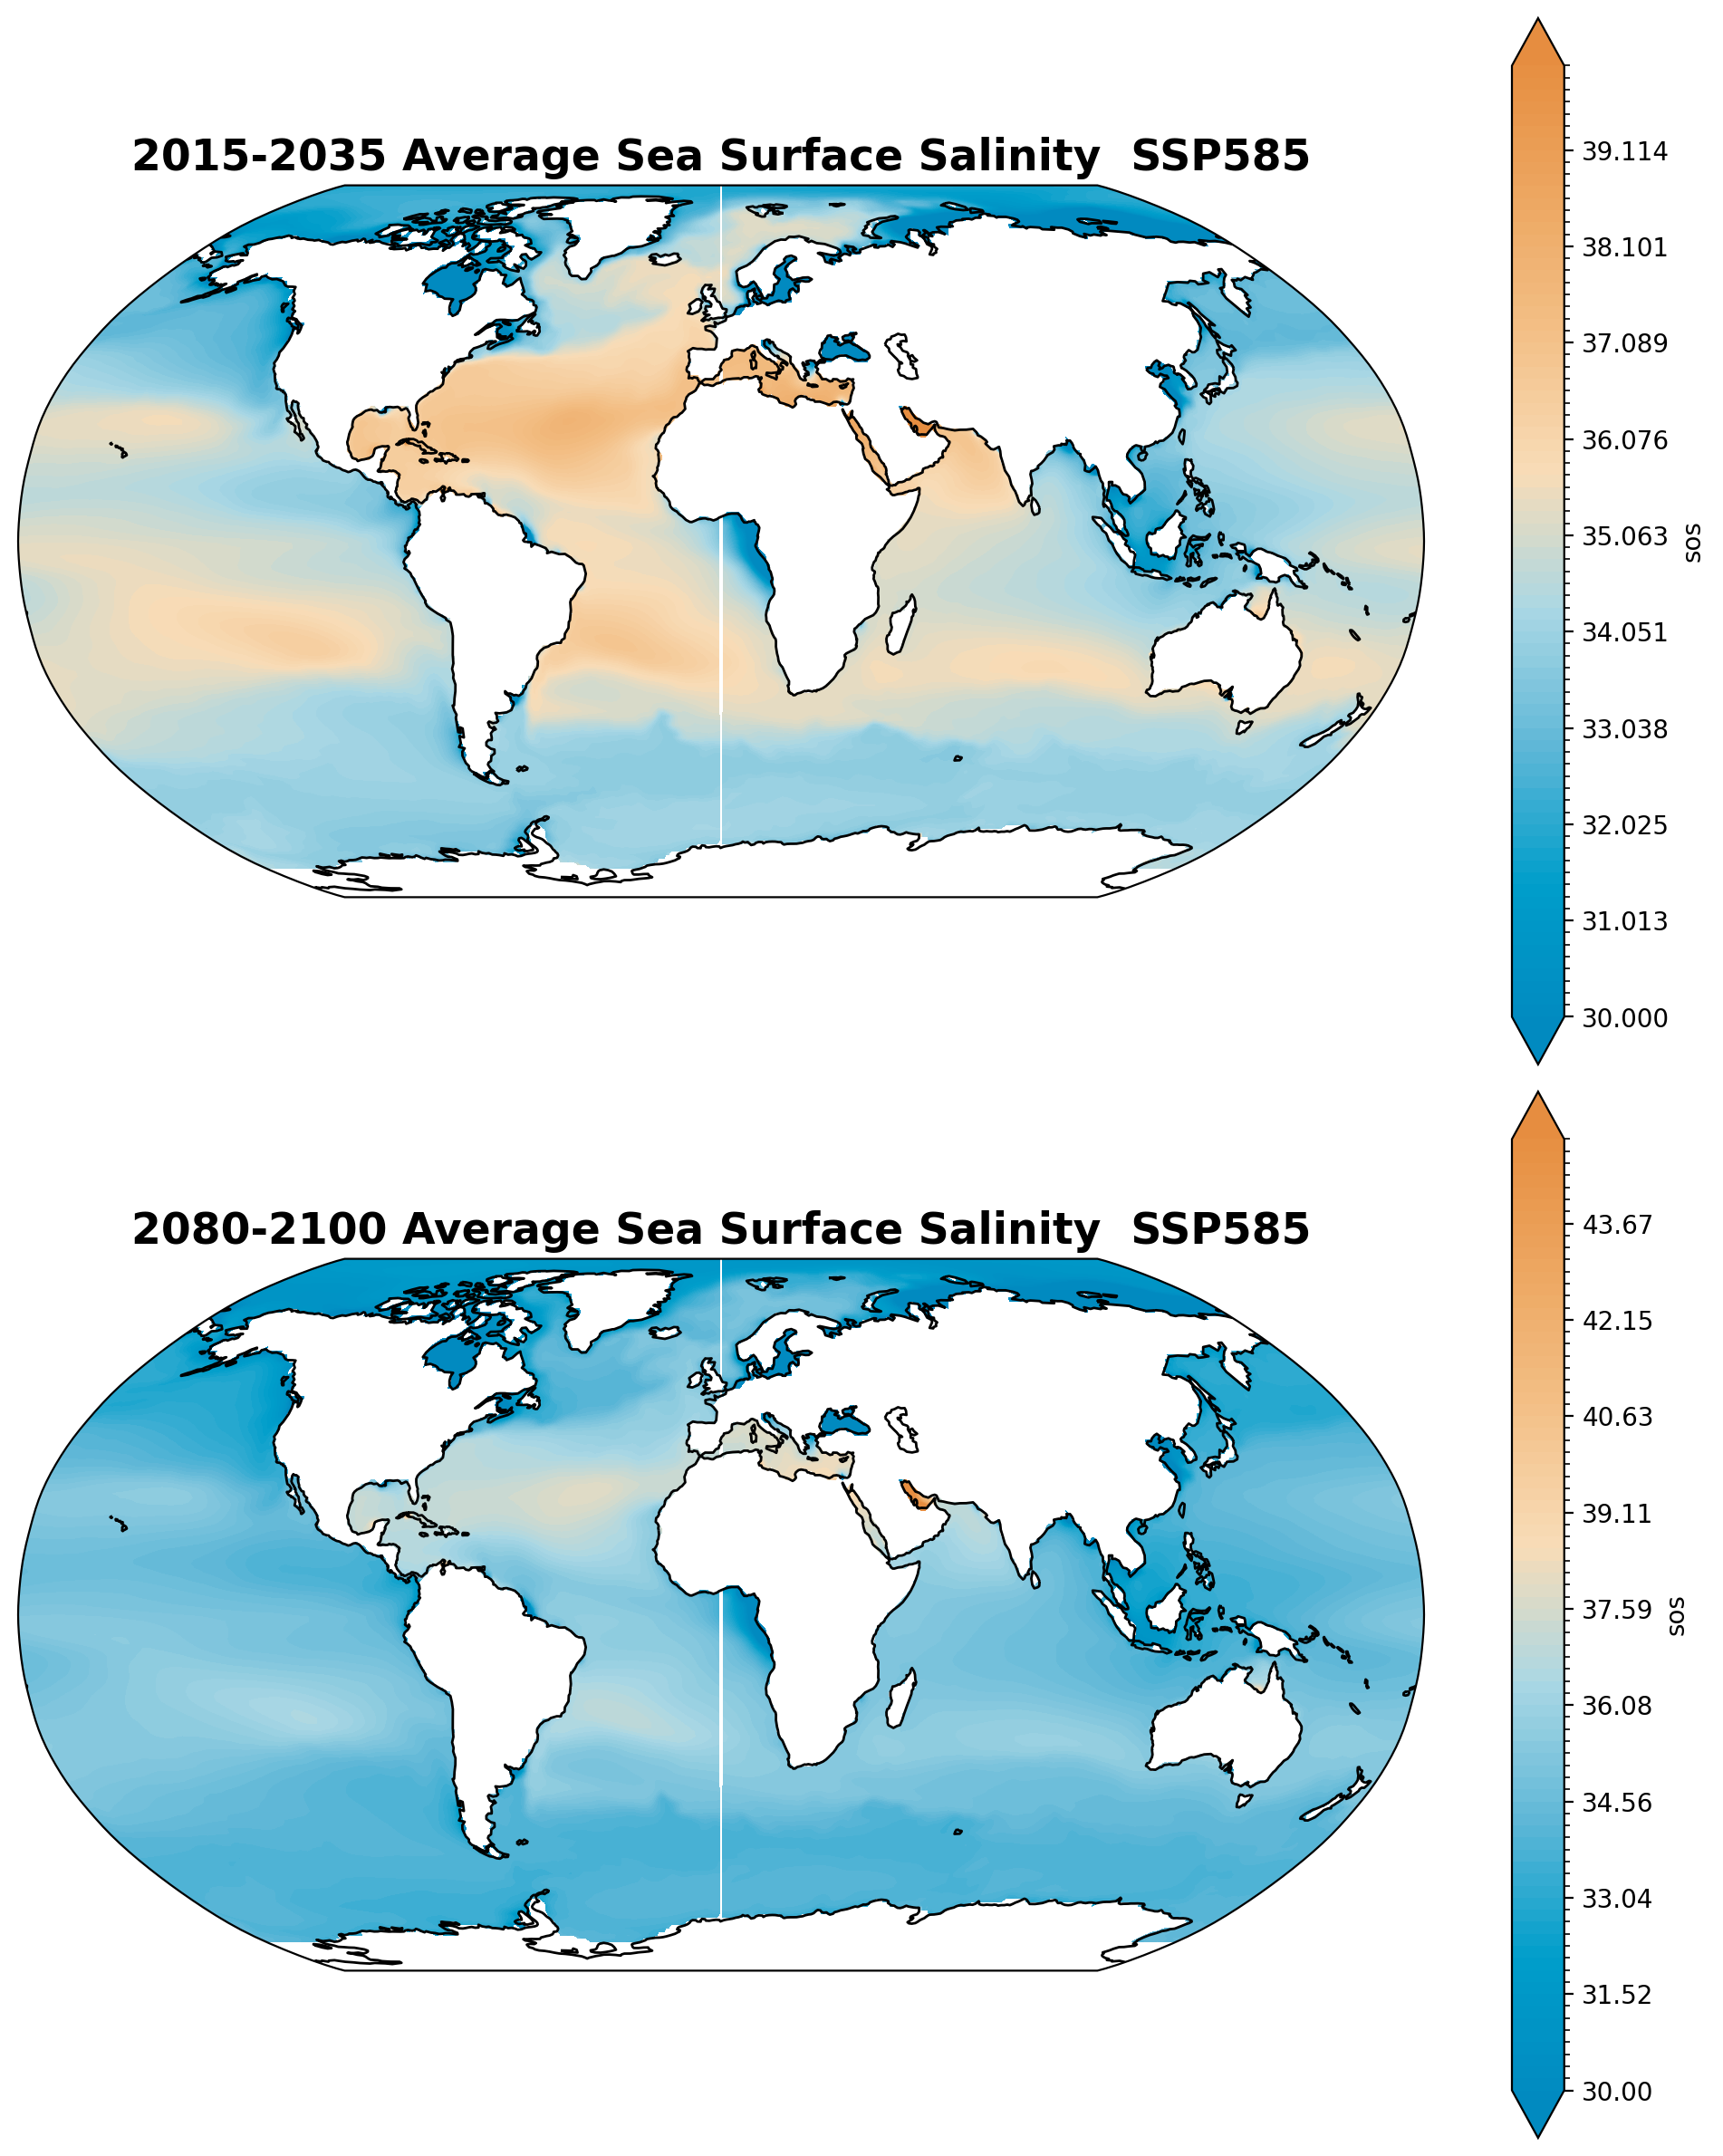

In [18]:
subplot_kws=dict(projection=ccrs.Robinson())

### set up our figure settings
fig, (ax1,ax2) = plt.subplots(ncols=1,
                               nrows=2,
                               figsize=(10,12),
                               subplot_kw=subplot_kws) ## set up our plotting area

### plot our data
baseline_salinity_first_years_585.plot.contourf(ax=ax1, cmap=wocemaps.salinity, levels=80, vmin=30, vmax=40, extend='both',
                                transform=ccrs.PlateCarree())
baseline_salinity_last_years_585.plot.contourf(ax=ax2, cmap=wocemaps.salinity, levels=80, vmin=30, vmax=45, extend='both',
                                transform=ccrs.PlateCarree())


## customize our subplots
ax1.set_title("2015-2035 Average Sea Surface Salinity  SSP585", fontweight='bold', fontsize=17)
ax2.set_title('2080-2100 Average Sea Surface Salinity  SSP585', fontweight='bold', fontsize=17)

plt.tight_layout() ## make it look nicely spaced!

### add some coastlines
ax1.coastlines()
ax2.coastlines()



__Figure 4.__ 2015-2035 Global Average Sea Surface Salinity from scenario SSP585 (top graph), 2080-2100 Global Average Sea Surface Salinity (bottom graph)

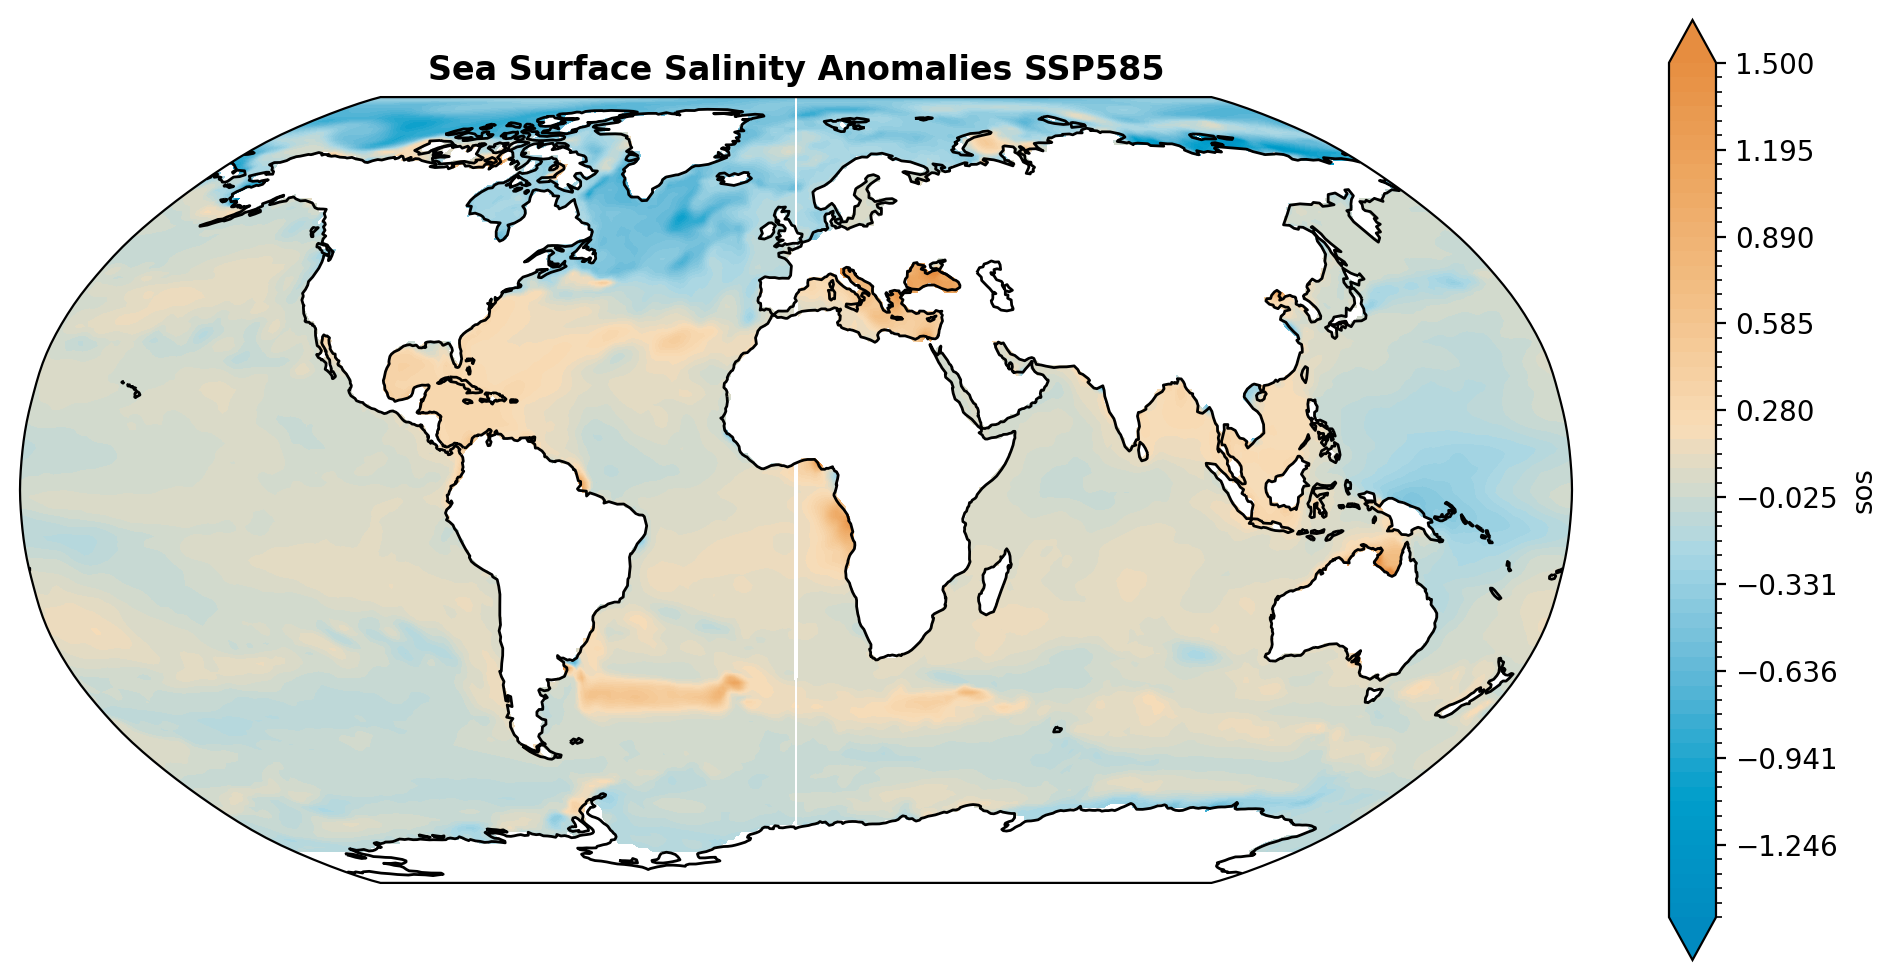

In [19]:
subplot_kws=dict(projection=ccrs.Robinson())

### set up our figure settings
fig, (ax1) = plt.subplots(ncols=1,
                               nrows=1,
                               figsize=(10,5),
                               subplot_kw=subplot_kws) ## set up our plotting area

### plot our data
baseline_difference_585.plot.contourf(ax=ax1, cmap=wocemaps.salinity, vmin=-1.5, vmax=1.5, levels=60, extend='both',
                                transform=ccrs.PlateCarree())

## customize our subplots
ax1.set_title("Sea Surface Salinity Anomalies SSP585", fontweight='bold')

ax1.set_ylabel('Latitude', fontsize = 15)
ax1.set_xlabel('Longitude', fontsize = 15)

plt.tight_layout() ## make it look nicely spaced!

### add some coastlines
ax1.coastlines()


__Figure 5.__ Global Sea Surface Salinity Anomalies from scenario SSP585

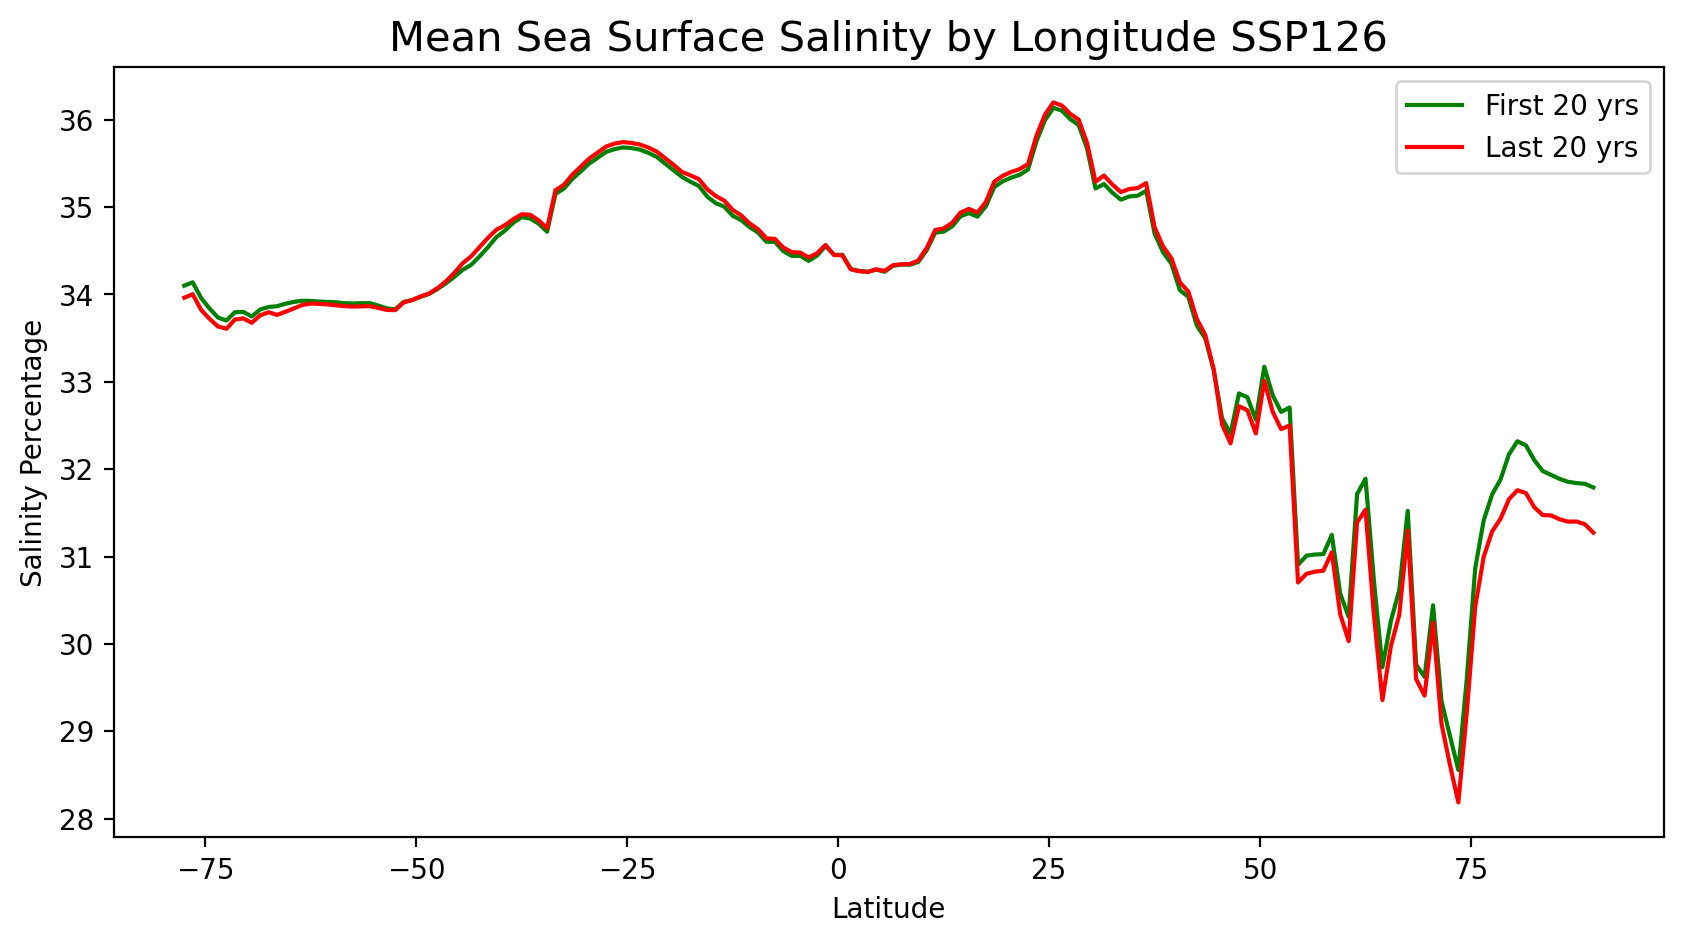

In [20]:
fig, ax = plt.subplots(figsize = (10,5))
avg_first_yearsos_585 = baseline_salinity_first_years_585.mean(dim = 'longitude').plot(color = 'green', label='First 20 yrs')
avg_last_yearsos_585 = baseline_salinity_last_years_585.mean(dim = 'longitude').plot(color = 'red', label='Last 20 yrs')
plt.title("Average Sea Surface Salinity by Latitude SSP585")
ax.set_title('Mean Sea Surface Salinity by Longitude SSP126', fontsize = 15)
ax.set_xlabel('Latitude')
ax.set_ylabel("Salinity Percentage")
ax.legend()

__Figure 6.__ Mean Logitudinal Average Sea Surface Salinity from scenario SSP585

# Monthly Precipitation ssp126

In [21]:
prw_ssp126_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'pr' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)
prw_126_zarr = prw_ssp126_data.zstore.values[-1]
# create a mutable-mapping-style interface to the store
mapper_126_prw = gcs.get_mapper(prw_126_zarr)
# open the dataset using xarray and zarr
gfdl_esm4_126_prw = xr.open_zarr(mapper_126_prw, 
                                consolidated=True,use_cftime=True).pr.rename({'lat':'latitude',
                                                             'lon':'longitude'})

# Monthly Precipitation ssp585

In [22]:
pr_ssp585_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'pr' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)
prw_585_zarr = prw_ssp585_data.zstore.values[-1]
# create a mutable-mapping-style interface to the store
mapper_585_prw = gcs.get_mapper(prw_585_zarr)
# open the dataset using xarray and zarr
gfdl_esm4_585_prw = xr.open_zarr(mapper_585_prw, 
                                consolidated=True,use_cftime=True).prw.rename({'lat':'latitude',
                                                             'lon':'longitude'})

NameError: name 'prw_ssp585_data' is not defined

# Monthly water vapor content 126

In [33]:
wv_ssp126_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'prw' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)
wv_126_zarr = wv_ssp126_data.zstore.values[-1]
# create a mutable-mapping-style interface to the store
mapper_126_wv = gcs.get_mapper(wv_126_zarr)
# open the dataset using xarray and zarr
gfdl_esm4_126_wv = xr.open_zarr(mapper_126_wv, 
                                consolidated=True,use_cftime=True).prw.rename({'lat':'latitude',
                                                             'lon':'longitude'})

In [34]:
wv_first_years_126 = gfdl_esm4_126_wv.sel(time=slice('2015-01-16', '2035-01-01')).mean(dim='time')
wv_last_years_126 = gfdl_esm4_126_wv.sel(time=slice('2080-12-16', '2100-12-16')).mean(dim='time')
difference_wv_126 = wv_last_years_126 - wv_first_years_126

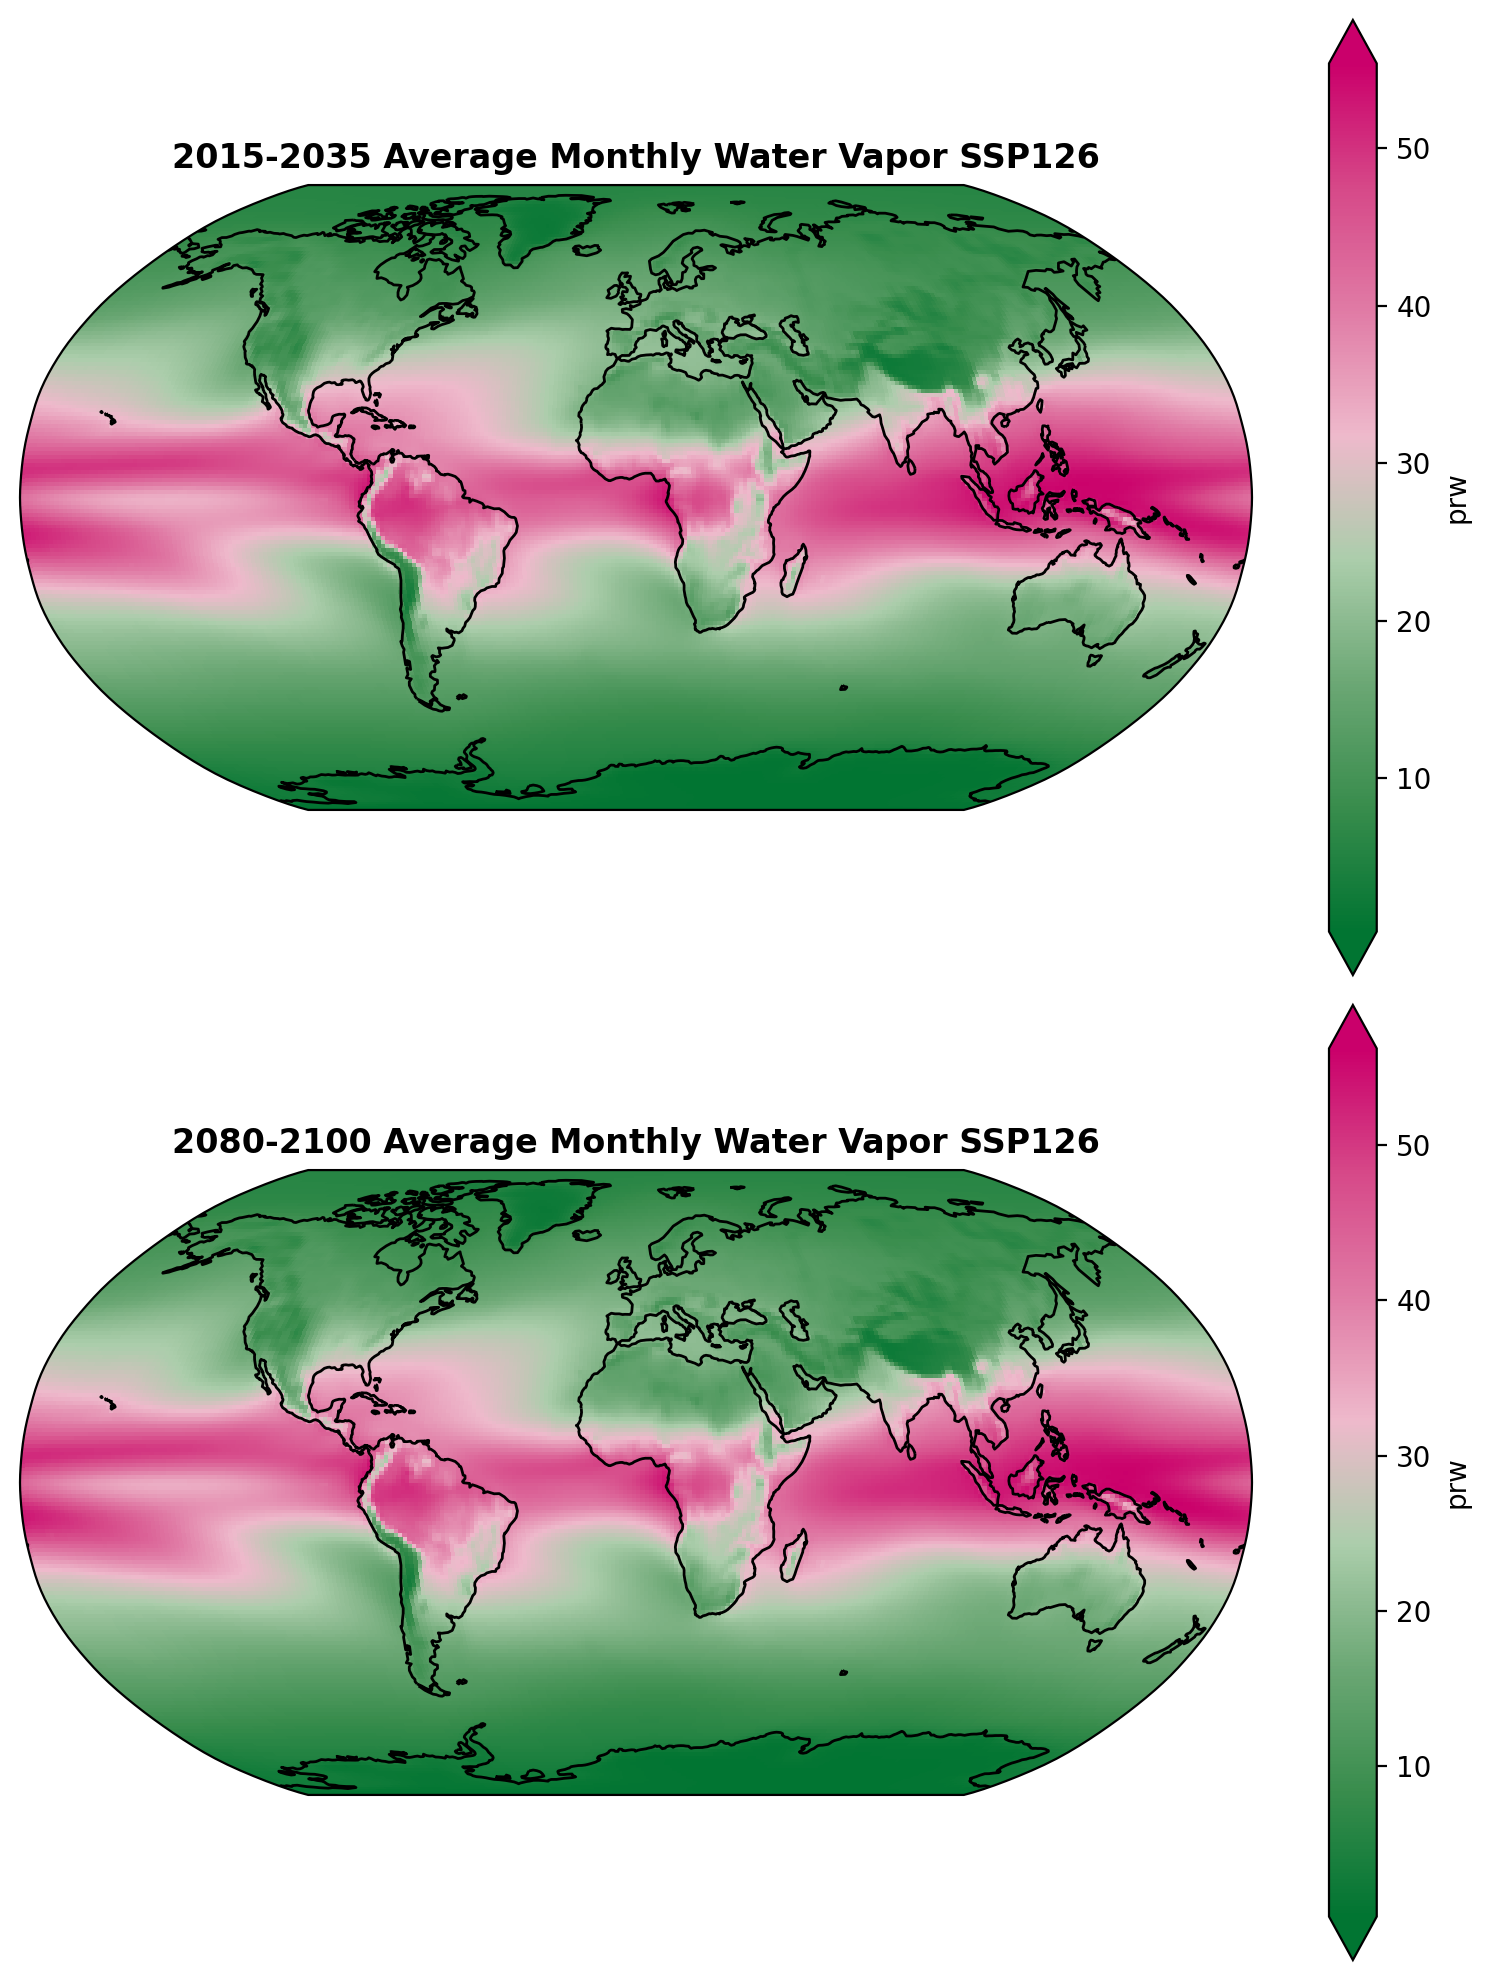

In [35]:
subplot_kws=dict(projection=ccrs.Robinson())

### set up our figure settings
fig, (ax1,ax2) = plt.subplots(ncols=1,
                               nrows=2,
                               figsize=(8,10),
                               subplot_kw=subplot_kws) ## set up our plotting area

### plot our data
wv_first_years_126.plot(ax=ax1, cmap=wocemaps.d14c, extend='both',
                                transform=ccrs.PlateCarree())
wv_last_years_126.plot(ax=ax2, cmap=wocemaps.d14c, extend='both',
                                transform=ccrs.PlateCarree())


## customize our subplots
ax1.set_title("2015-2035 Average Monthly Water Vapor SSP126", fontweight='bold')
ax2.set_title('2080-2100 Average Monthly Water Vapor SSP126', fontweight='bold')

ax1.set_ylabel('Latitude', fontsize = 15)
ax1.set_xlabel('Longitude', fontsize = 15)

ax2.set_ylabel('Latitude', fontsize = 15)
ax2.set_xlabel('Longitude', fontsize = 15)

plt.tight_layout() ## make it look nicely spaced!

### add some coastlines
ax1.coastlines()
ax2.coastlines()



__Figure 7.__ 2015-2035 monthly average water vapor content from scenario SSP126 (top graph), 2080-2100 monthly average water vapor content (bottom graph)

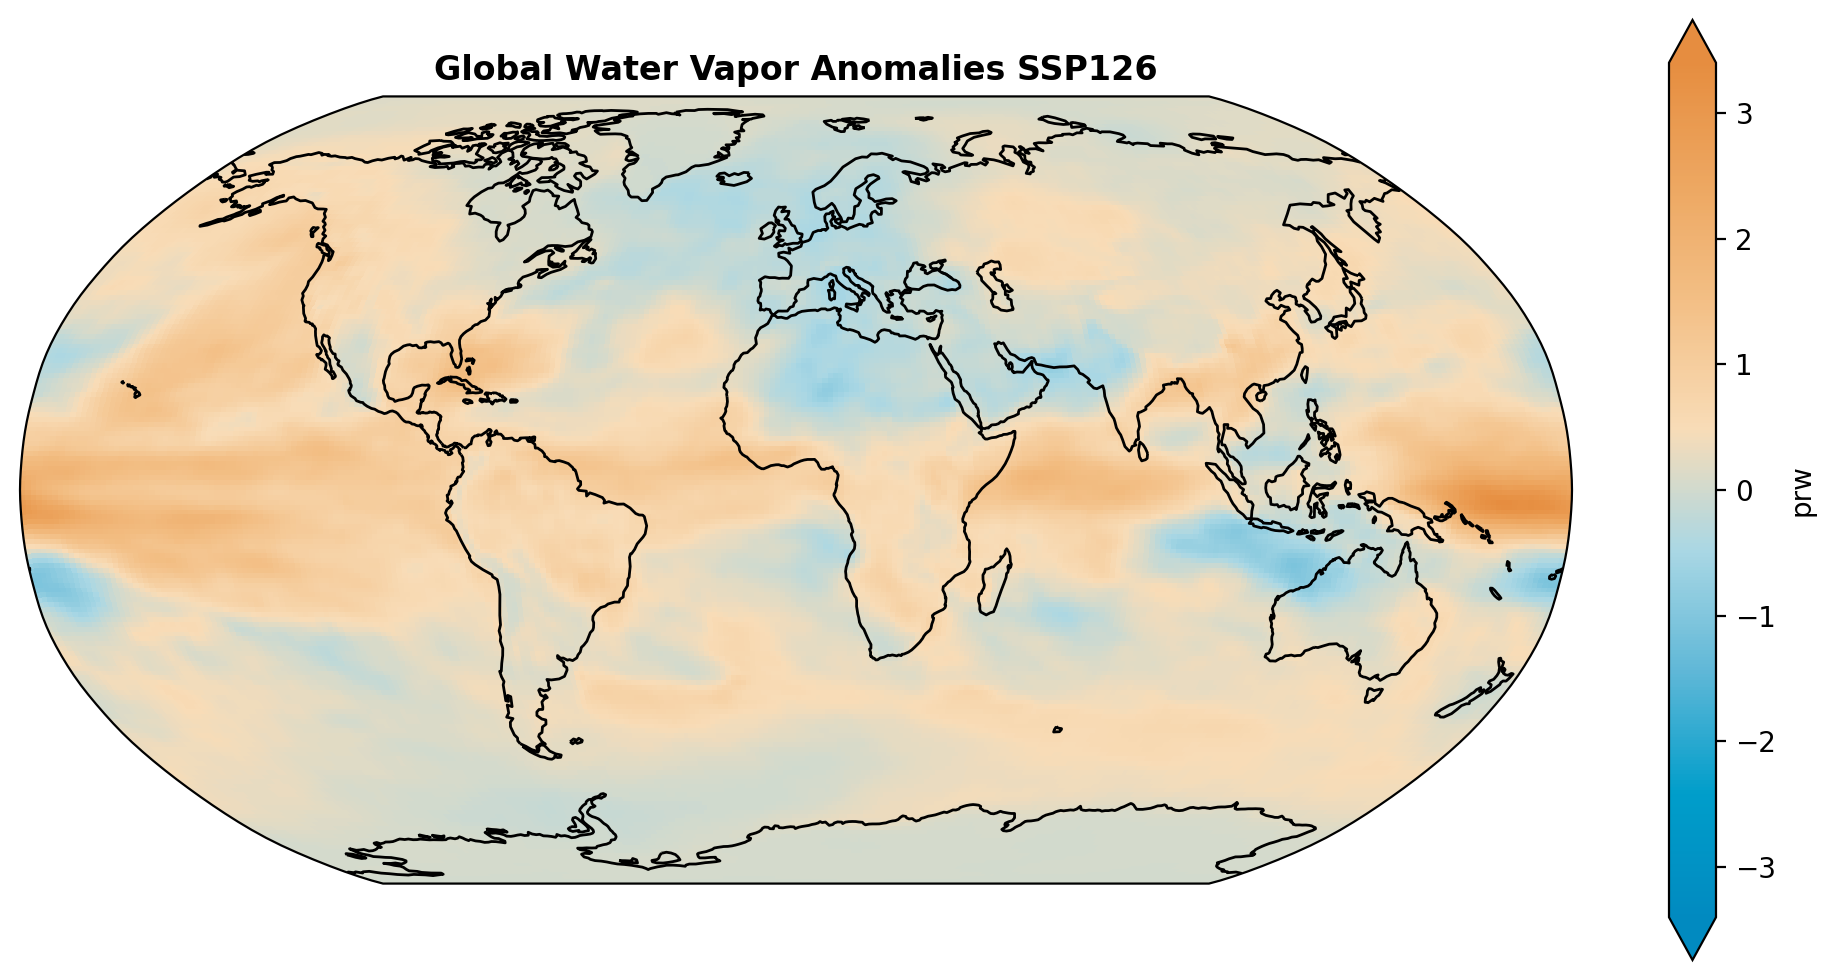

In [36]:
subplot_kws=dict(projection=ccrs.Robinson())

### set up our figure settings
fig, (ax1) = plt.subplots(ncols=1,
                               nrows=1,
                               figsize=(10,5),
                               subplot_kw=subplot_kws) ## set up our plotting area

### plot our data
difference_wv_126.plot(ax=ax1, cmap=wocemaps.salinity, extend='both',
                                transform=ccrs.PlateCarree())

## customize our subplots
ax1.set_title("Global Water Vapor Anomalies SSP126", fontweight='bold')

ax1.set_ylabel('Latitude', fontsize = 15)
ax1.set_xlabel('Longitude', fontsize = 15)

plt.tight_layout() ## make it look nicely spaced!

### add some coastlines
ax1.coastlines()


__Figure 8.__ Global water vapor anomalies from scenario SSP126.

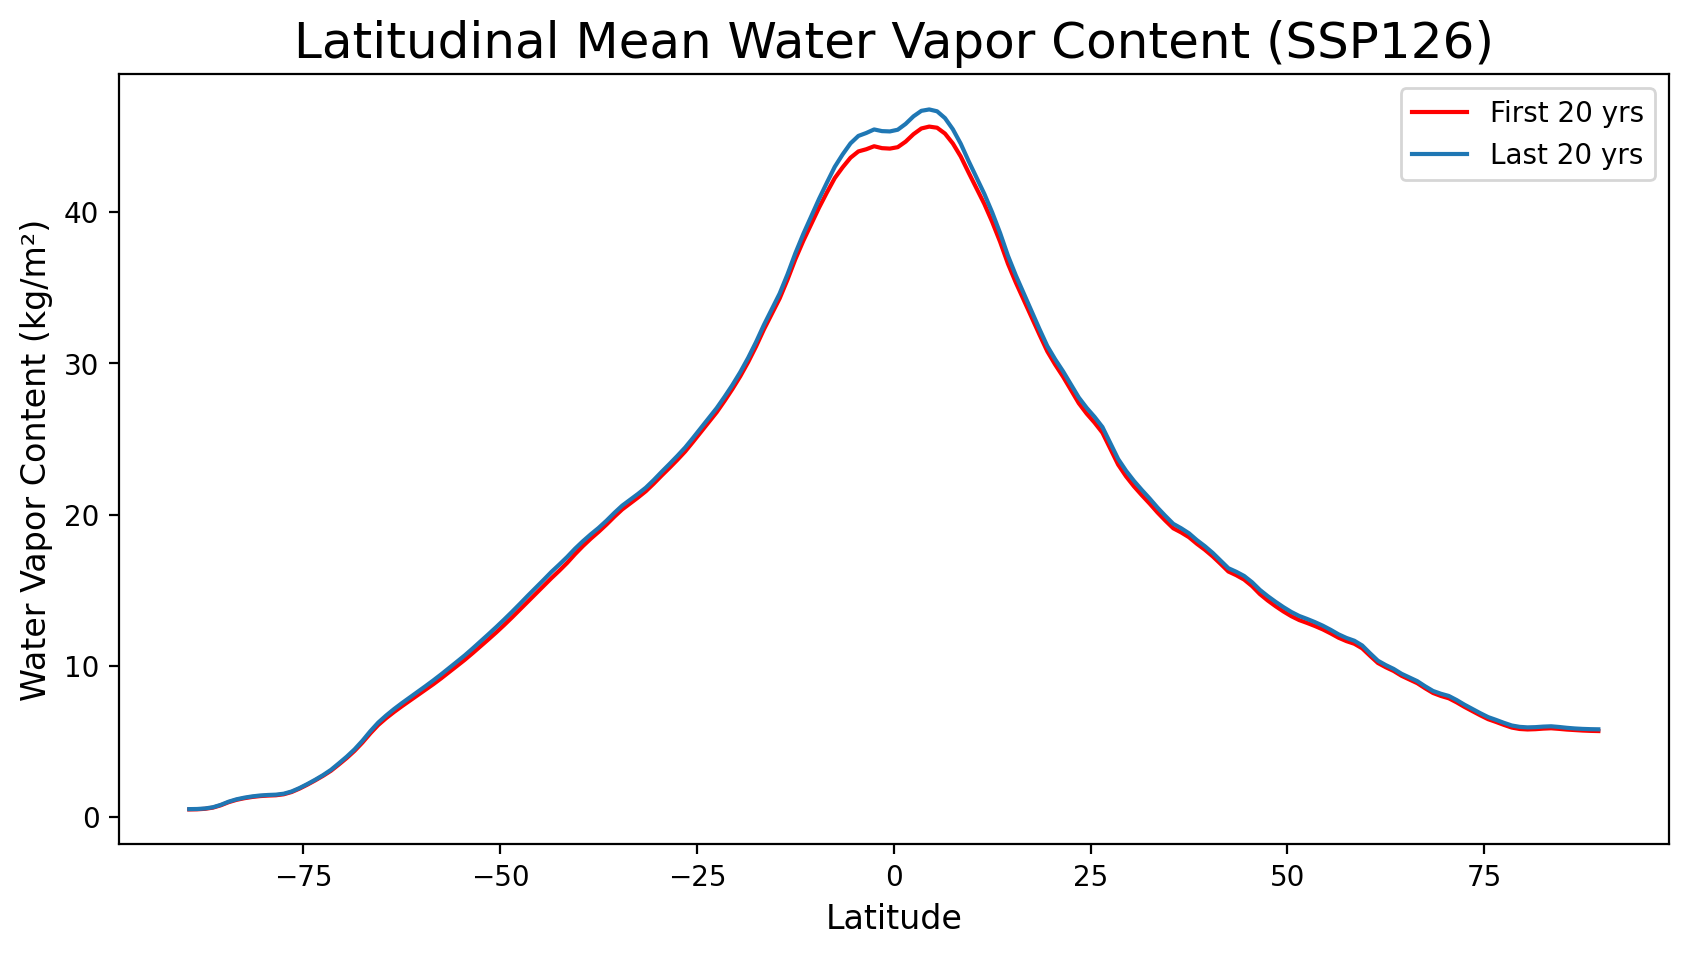

In [54]:
fig, ax = plt.subplots(figsize = (10,5))

av_wv_first_years_126 = wv_first_years_126.mean(dim='longitude').plot(color='red', label='First 20 yrs')
avg_wv_last_years_126 = wv_last_years_126.mean(dim='longitude').plot(label='Last 20 yrs')
ax.set_title('Latitudinal Mean Water Vapor Content (SSP126)', fontsize = 18)

# Adding axis titles/legends
ax.set_ylabel('Water Vapor Content (kg/m²)', fontsize = 12)
ax.set_xlabel('Latitude', fontsize = 12)
ax.legend()

__Figure 8.__ Logitudinally Averaged Water Vapor Content from scenario SSP126

In [38]:
# Code from Dr. Beadling:

# The following function is used to create weights for the Earths grid space.
import warnings 

def standard_grid_cell_area(latitude, longitude, rE=6371.0e3):
    """ computes the cell area for a standard spherical grid """

    dLat = latitude[1] - latitude[0]
    dLon = longitude[1] - longitude[0]
    area = np.empty((len(latitude), len(longitude)))
    for j in range(0, len(latitude)):
        for i in range(0, len(longitude)):
            lon1 = longitude[i] + dLon / 2
            lon0 = longitude[i] - dLon / 2
            lat1 = latitude[j] + dLat / 2
            lat0 = latitude[j] - dLat / 2
            area[j, i] = (
                (np.pi / 180.0)
                * rE
                * rE
                * np.abs(np.sin(np.radians(lat0)) - np.sin(np.radians(lat1)))
                * np.abs(lon0 - lon1)
            )
    return area

lat_sst = gfdl_esm4_126_wv.coords['latitude'].values #1-D numpy array of model's latitude values
lon_sst = gfdl_esm4_126_wv.coords['longitude'].values #1-D numpy array of model's longitude values

# make sure to replace the name of the data array if you chose a 
# different name and use the appropriate coordinate names within the ['']
# based on the coordinates of lat / lon in your dataset.

# Pass the arrays to the standard_grid_cell_area function
areacell = standard_grid_cell_area(lat_sst,lon_sst)  

# The areacella_xarray function outputs a numpy array. Convert this back into 
# and xarray DataArray for further use. If this is a field you will be using 
# often. You may wish to save this newly created DataArray as a Dataset and save 
# as a netcdf file.
# here we assign dimensions and coordinates that are the same as our original SST array:

areacell_xarray = xr.DataArray(areacell,dims=({'latitude':180, 'longitude':360}),\
                                                coords=(gfdl_esm4_126_wv.coords['latitude'],\
                                                        gfdl_esm4_126_wv.coords['longitude']))

In [39]:
weighted_prw126 = gfdl_esm4_126_wv.weighted(areacell_xarray).mean(['latitude', 'longitude']) 
weighted_prw585 = gfdl_esm4_585_wv.weighted(areacell_xarray).mean(['latitude', 'longitude'])

mean_prw126 = weighted_prw126.groupby('time.year').mean(dim = 'time')
mean_prw585 = weighted_prw585.groupby('time.year').mean(dim = 'time')

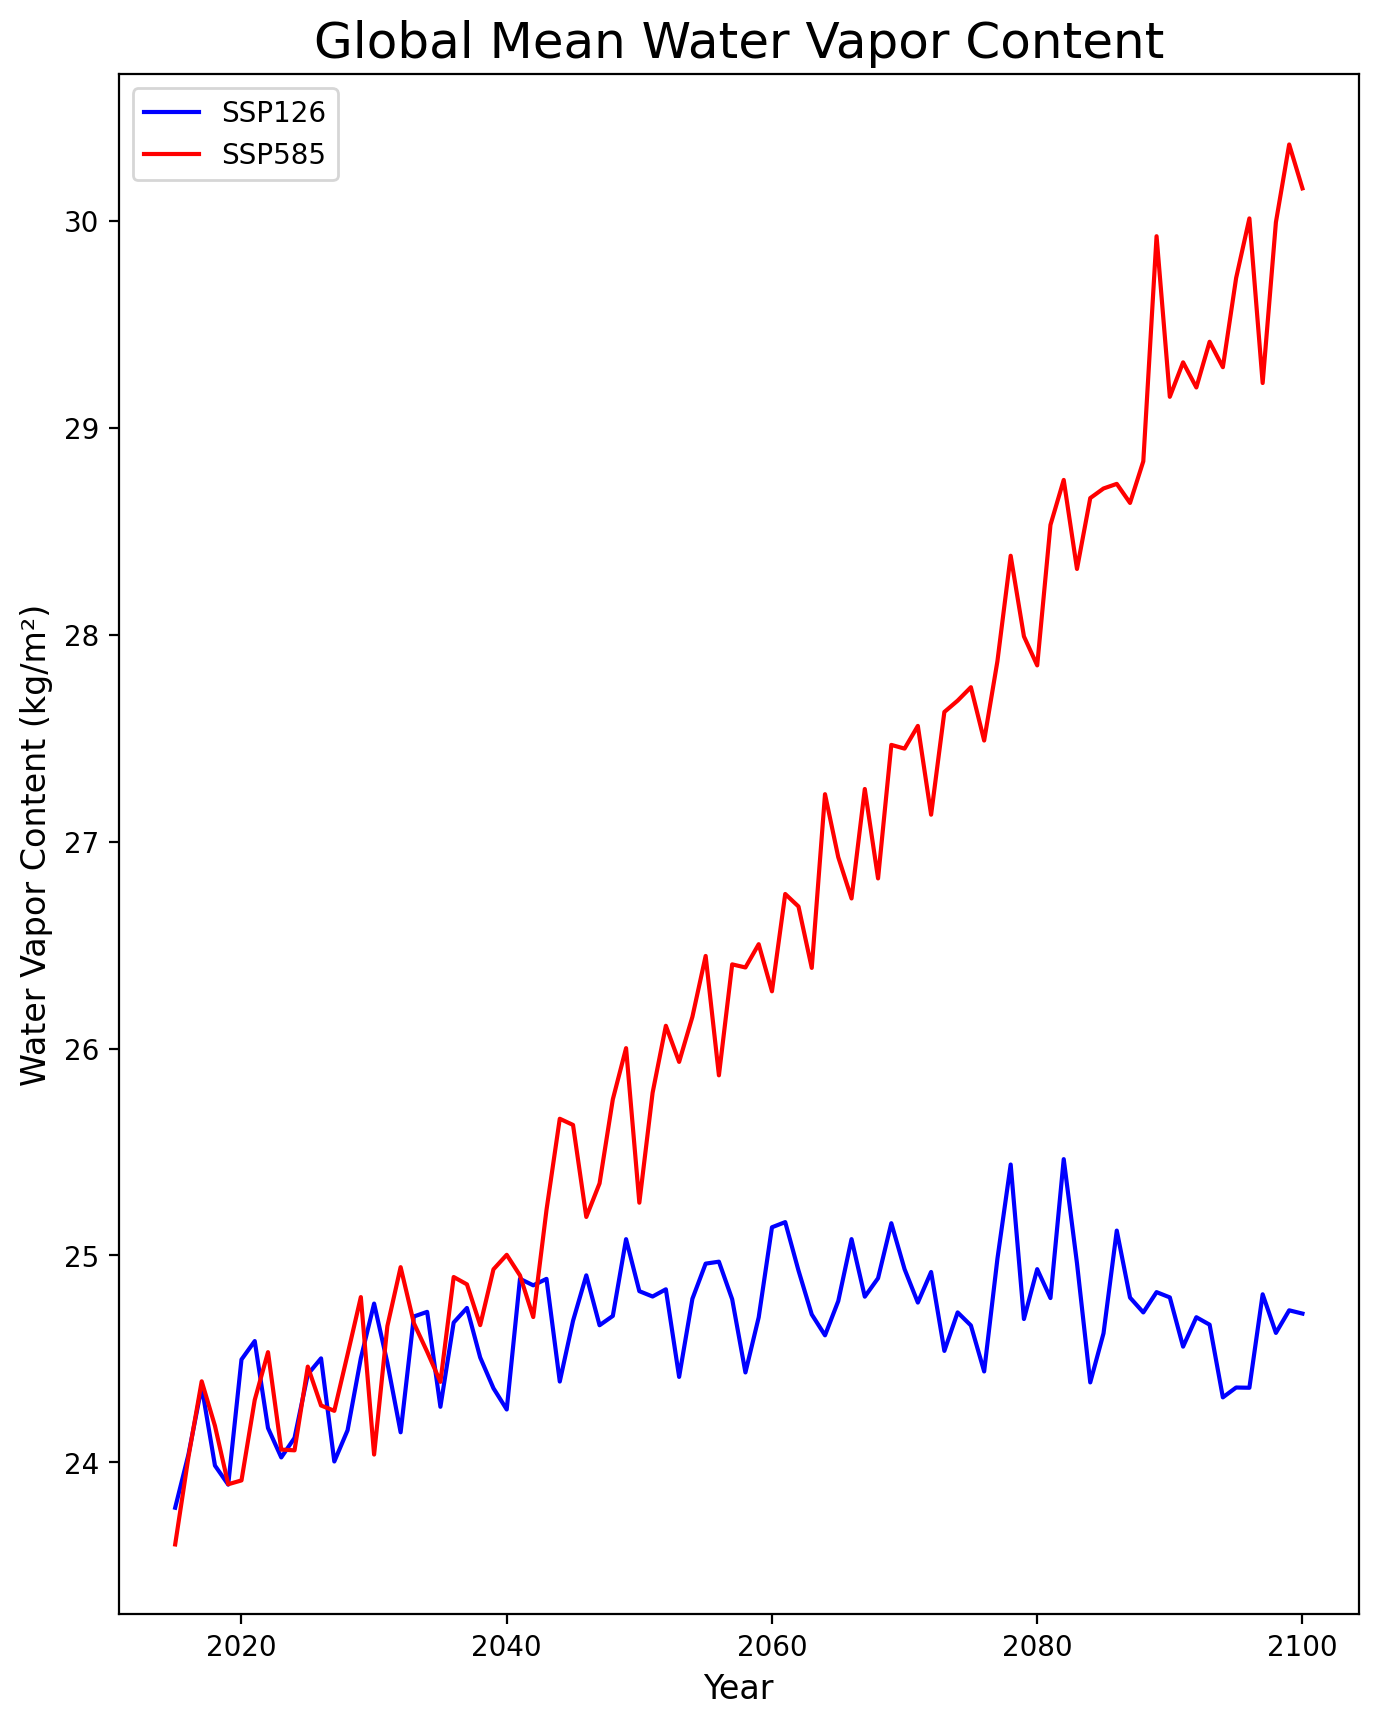

In [40]:
# Establishing figure parameters
fig, ax = plt.subplots(figsize = (8, 10))

# Assigning each dataset to the appropriate axis
mean_prw126.plot(color = 'blue', label = 'SSP126')
mean_prw585.plot(color = 'red', label = 'SSP585')

# Adding figure titles
ax.set_title('Global Mean Weighted Water Vapor Content', fontsize = 18)

# Adding axis titles/legends
ax.set_ylabel('Water Vapor Content (kg/m²)', fontsize = 12)
ax.set_xlabel('Year', fontsize = 12)
ax.legend()

__Figure 9.__ Global mean weighted water vapor content from scenario SSP126.

# Monthly water vapor content 585

In [32]:
wv_ssp585_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'prw' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)
wv_585_zarr = wv_ssp585_data.zstore.values[-1]
# create a mutable-mapping-style interface to the store
mapper_585_wv = gcs.get_mapper(wv_585_zarr)
# open the dataset using xarray and zarr
gfdl_esm4_585_wv = xr.open_zarr(mapper_585_wv, 
                                consolidated=True,use_cftime=True).prw.rename({'lat':'latitude',
                                                             'lon':'longitude'})

## Evaporation including sublimination and transpiration

In [47]:
evap_ssp126_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'evspsbl' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)
evap_126_zarr = evap_ssp126_data.zstore.values[-1]
# create a mutable-mapping-style interface to the store
mapper_126_evap = gcs.get_mapper(evap_126_zarr)
# open the dataset using xarray and zarr
gfdl_esm4_126_evap = xr.open_zarr(mapper_126_evap, 
                                consolidated=True,use_cftime=True).evspsbl.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_126_evap

<xarray.DataArray 'evspsbl' (time: 1032, latitude: 180, longitude: 288)>
dask.array<open_dataset-evspsbl, shape=(1032, 180, 288), dtype=float32, chunksize=(623, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Evaporation including Sublimation and Transpiration
    original_name:  evspsbl
    standard_name:  water_evapotranspiration_flux
    units:          kg m-2 s-1

## SSP126 Evaporation Graphs

In [48]:
baseline_evap_first_years = gfdl_esm4_126_evap.sel(time=slice('2015-01-16', '2035-01-01')).mean(dim='time')
baseline_evap_last_years = gfdl_esm4_126_evap.sel(time=slice('2080-12-16', '2100-12-16')).mean(dim='time')
difference_evap_126 = baseline_evap_last_years - baseline_evap_first_years


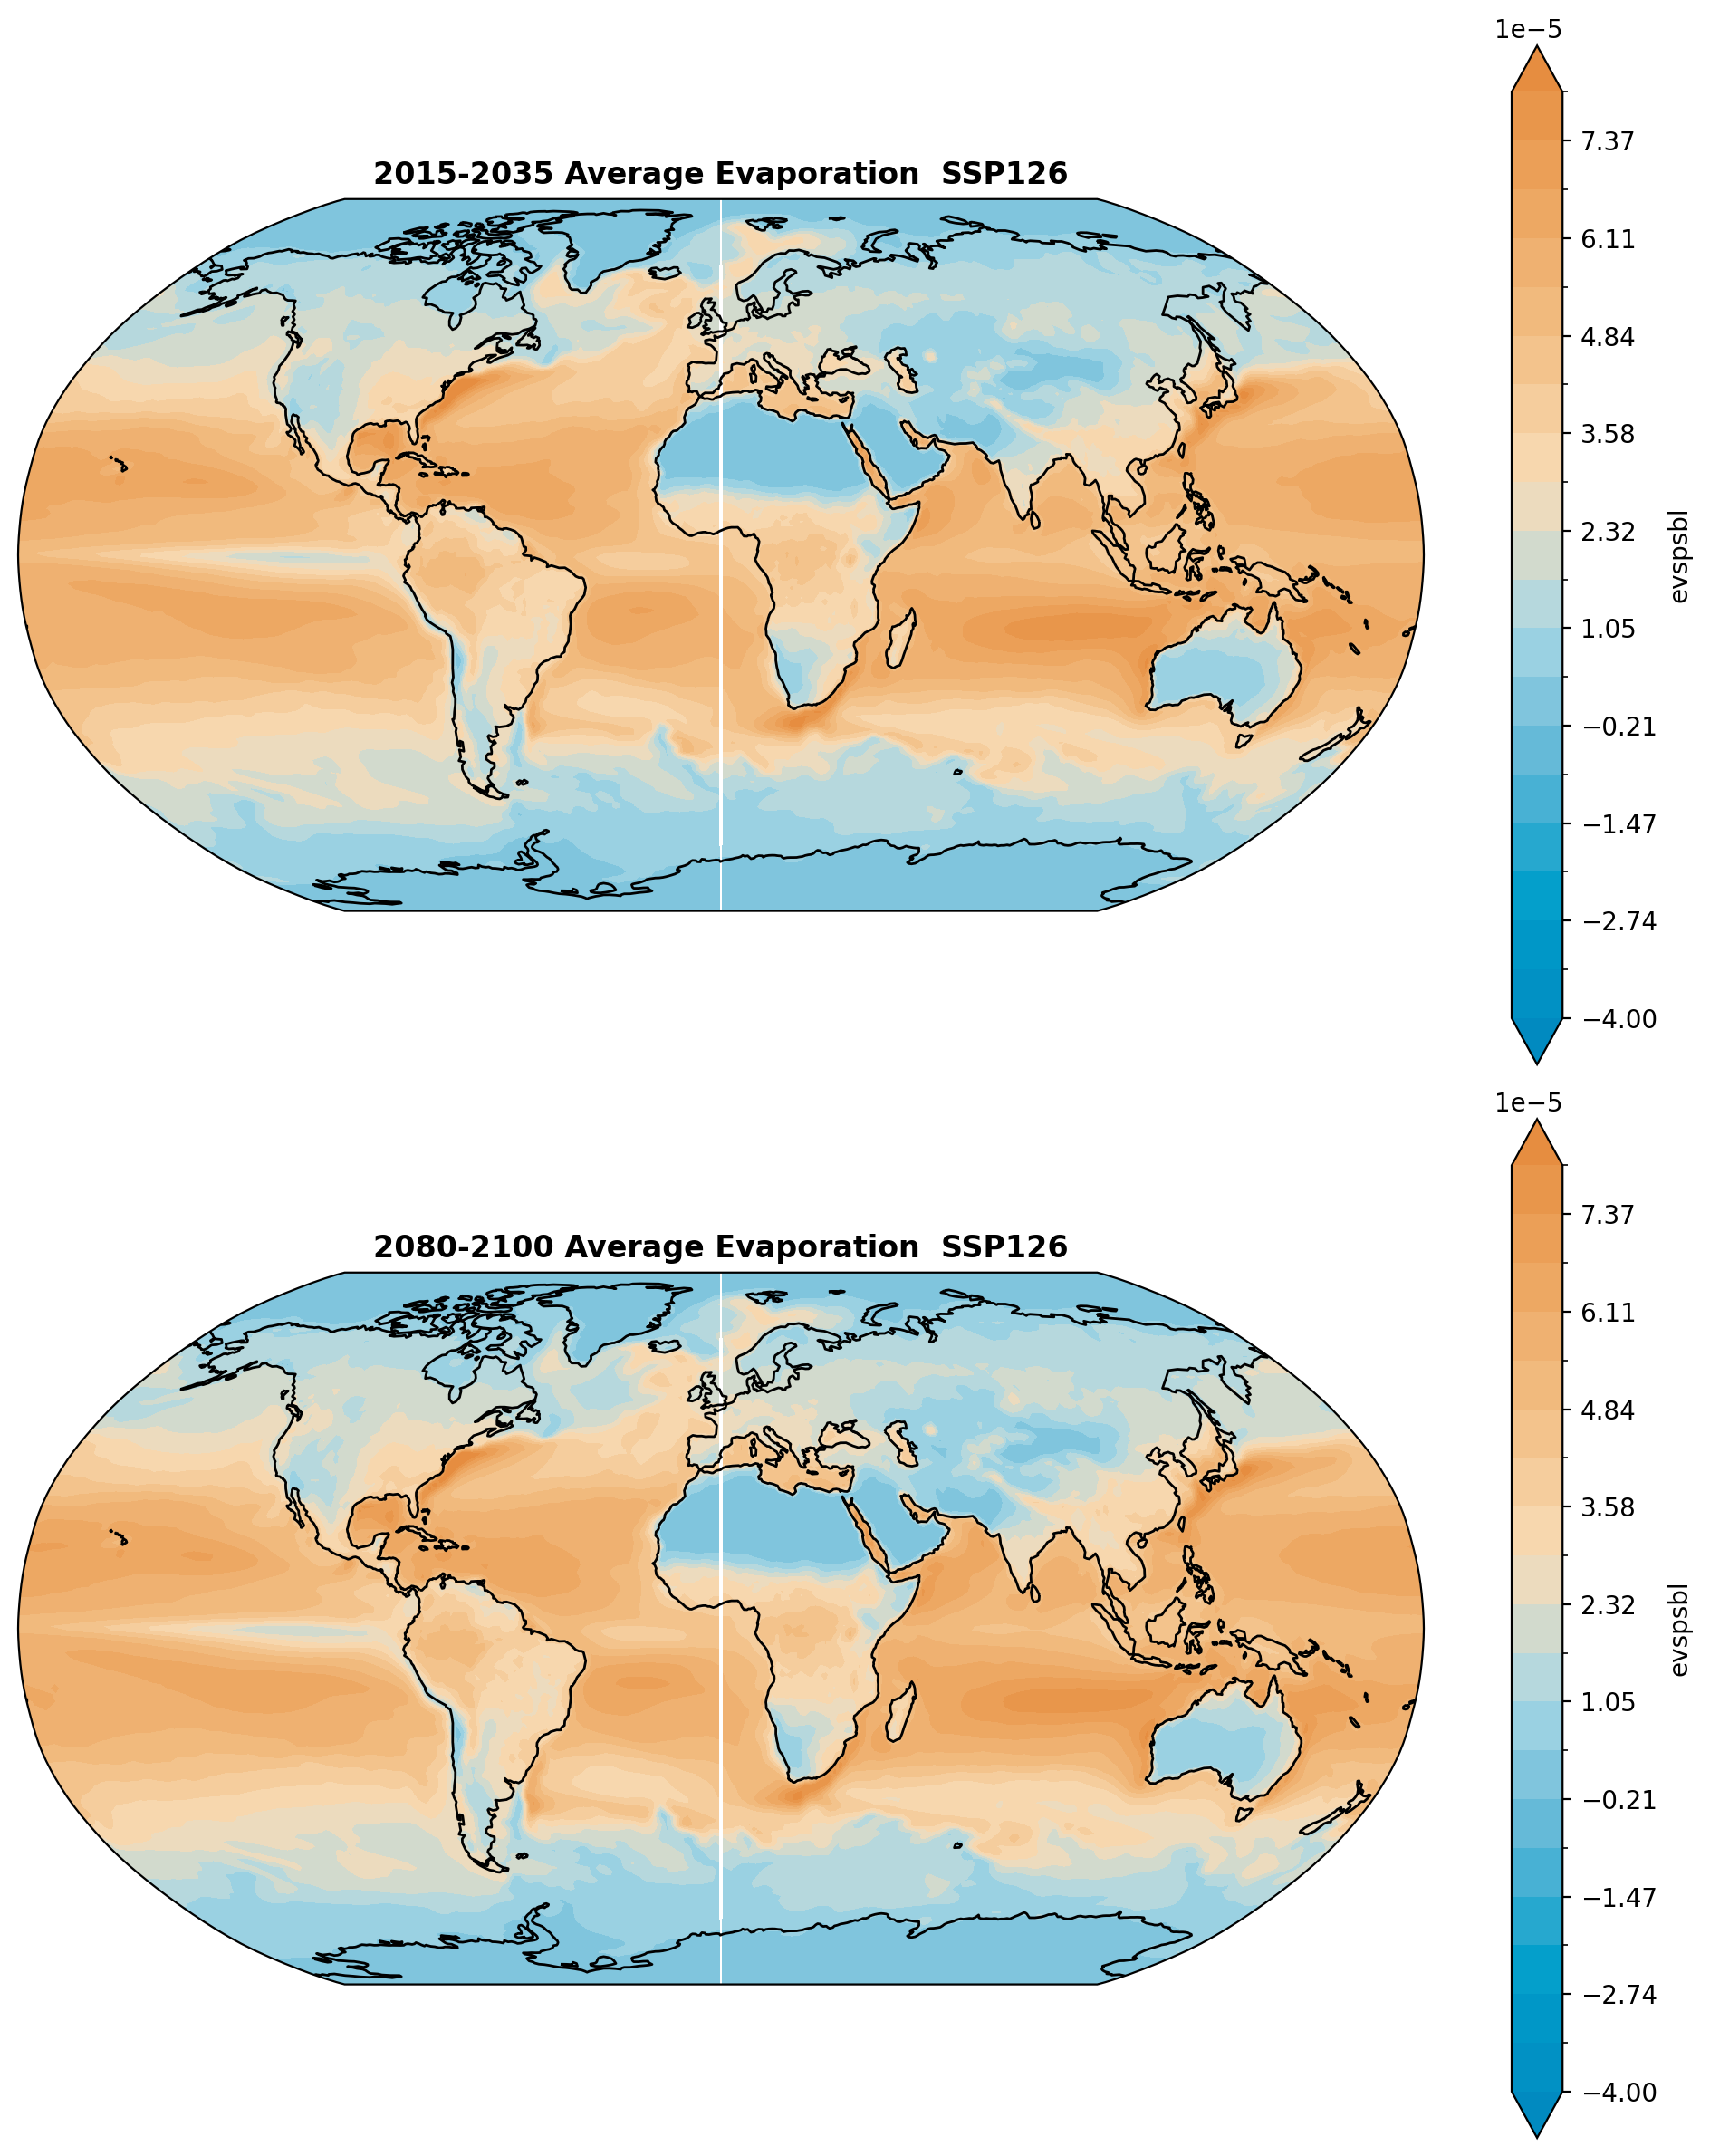

In [49]:
subplot_kws=dict(projection=ccrs.Robinson())

### set up our figure settings
fig, (ax1,ax2) = plt.subplots(ncols=1,
                               nrows=2,
                               figsize=(10,12),
                               subplot_kw=subplot_kws) ## set up our plotting area

### plot our data
baseline_evap_first_years.plot.contourf(ax=ax1, cmap=wocemaps.salinity,  levels=20, vmin=-0.00004, vmax=0.00008, extend='both',
                                transform=ccrs.PlateCarree())
baseline_evap_last_years.plot.contourf(ax=ax2, cmap=wocemaps.salinity, levels=20, vmin=-0.00004, vmax=0.00008, extend='both',
                                transform=ccrs.PlateCarree())


## customize our subplots
ax1.set_title("2015-2035 Average Evaporation  SSP126", fontweight='bold')
ax2.set_title('2080-2100 Average Evaporation  SSP126', fontweight='bold')

ax1.set_ylabel('Latitude', fontsize = 15)
ax1.set_xlabel('Longitude', fontsize = 15)

ax2.set_ylabel('Latitude', fontsize = 15)
ax2.set_xlabel('Longitude', fontsize = 15)

plt.tight_layout() ## make it look nicely spaced!

### add some coastlines
ax1.coastlines()
ax2.coastlines()



__Figure 10.__ 2015-2035 Average evaporation including transpiration and sublimination from scenario SSP126 (top graph), 2080-2100 Average Evaporation including transpiration and sublimination (bottom graph)

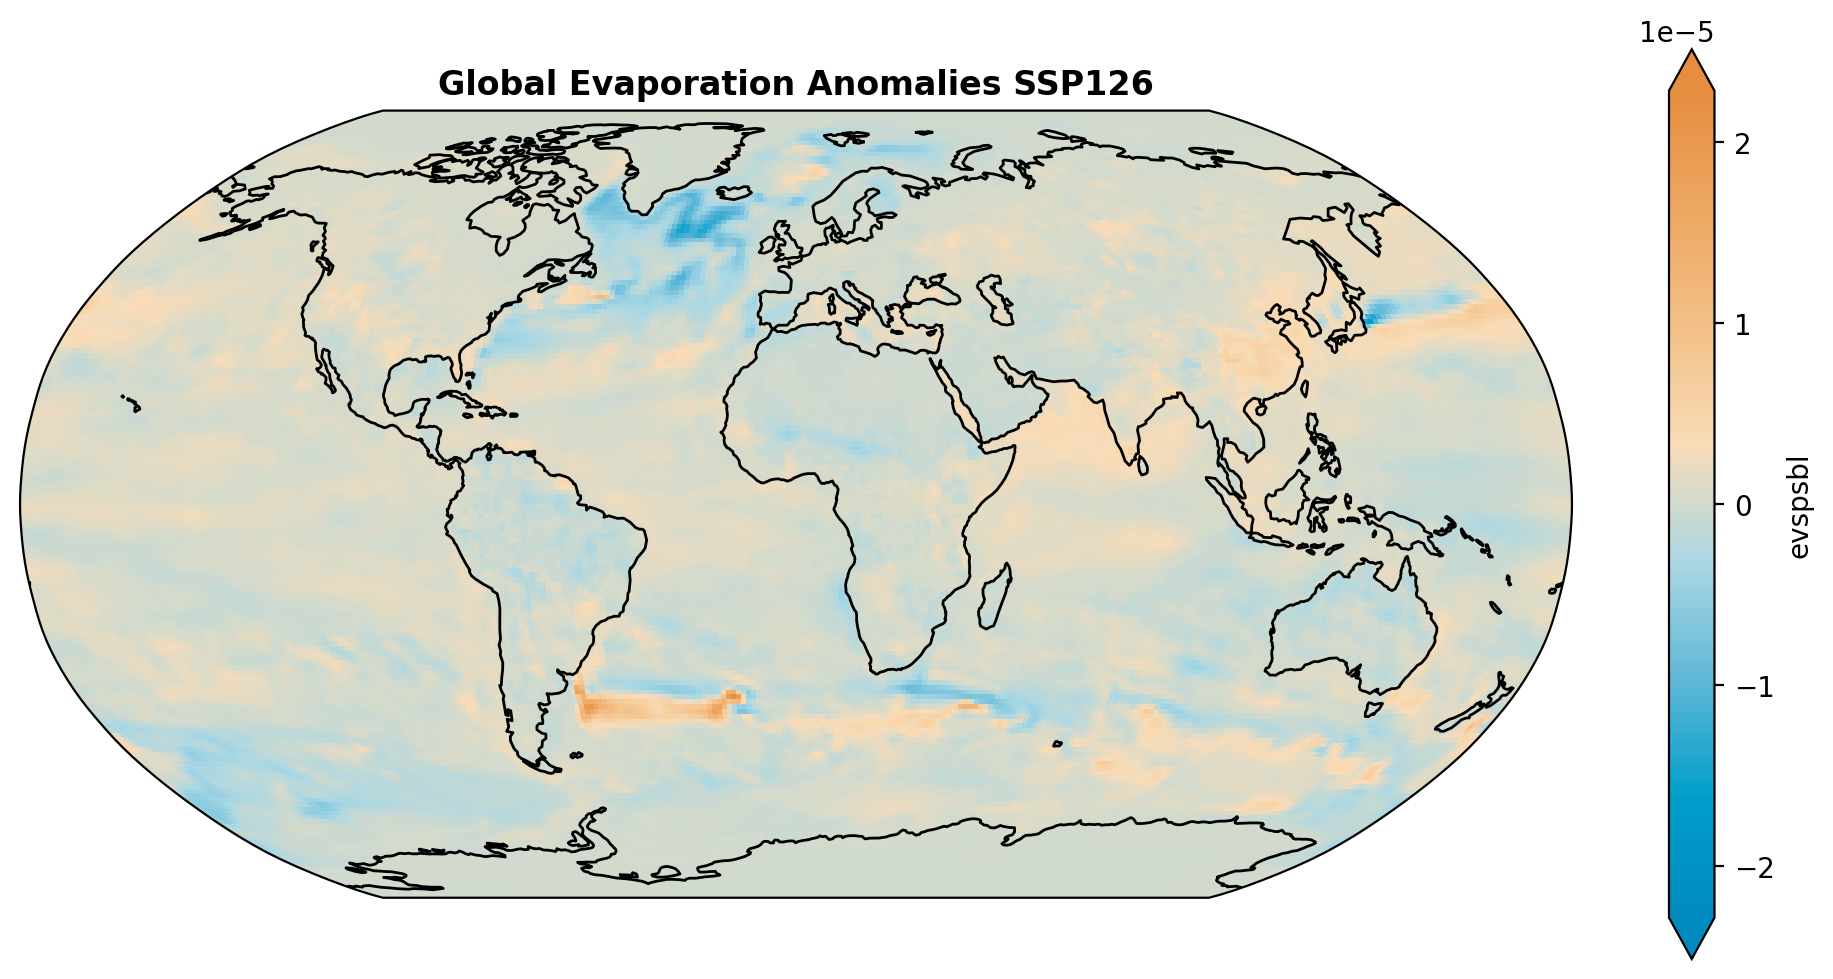

In [50]:
subplot_kws=dict(projection=ccrs.Robinson())

### set up our figure settings
fig, (ax1) = plt.subplots(ncols=1,
                               nrows=1,
                               figsize=(10,5),
                               subplot_kw=subplot_kws) ## set up our plotting area

### plot our data
difference_evap_126.plot(ax=ax1, cmap=wocemaps.salinity,extend='both',
                                transform=ccrs.PlateCarree())

## customize our subplots
ax1.set_title("Global Evaporation Anomalies SSP126", fontweight='bold')

ax1.set_ylabel('Latitude', fontsize = 15)
ax1.set_xlabel('Longitude', fontsize = 15)

plt.tight_layout() ## make it look nicely spaced!
### add some coastlines
ax1.coastlines()


__Figure 11.__ Average evaporation including transpiration and sublimination anomalies from scenario SSP126

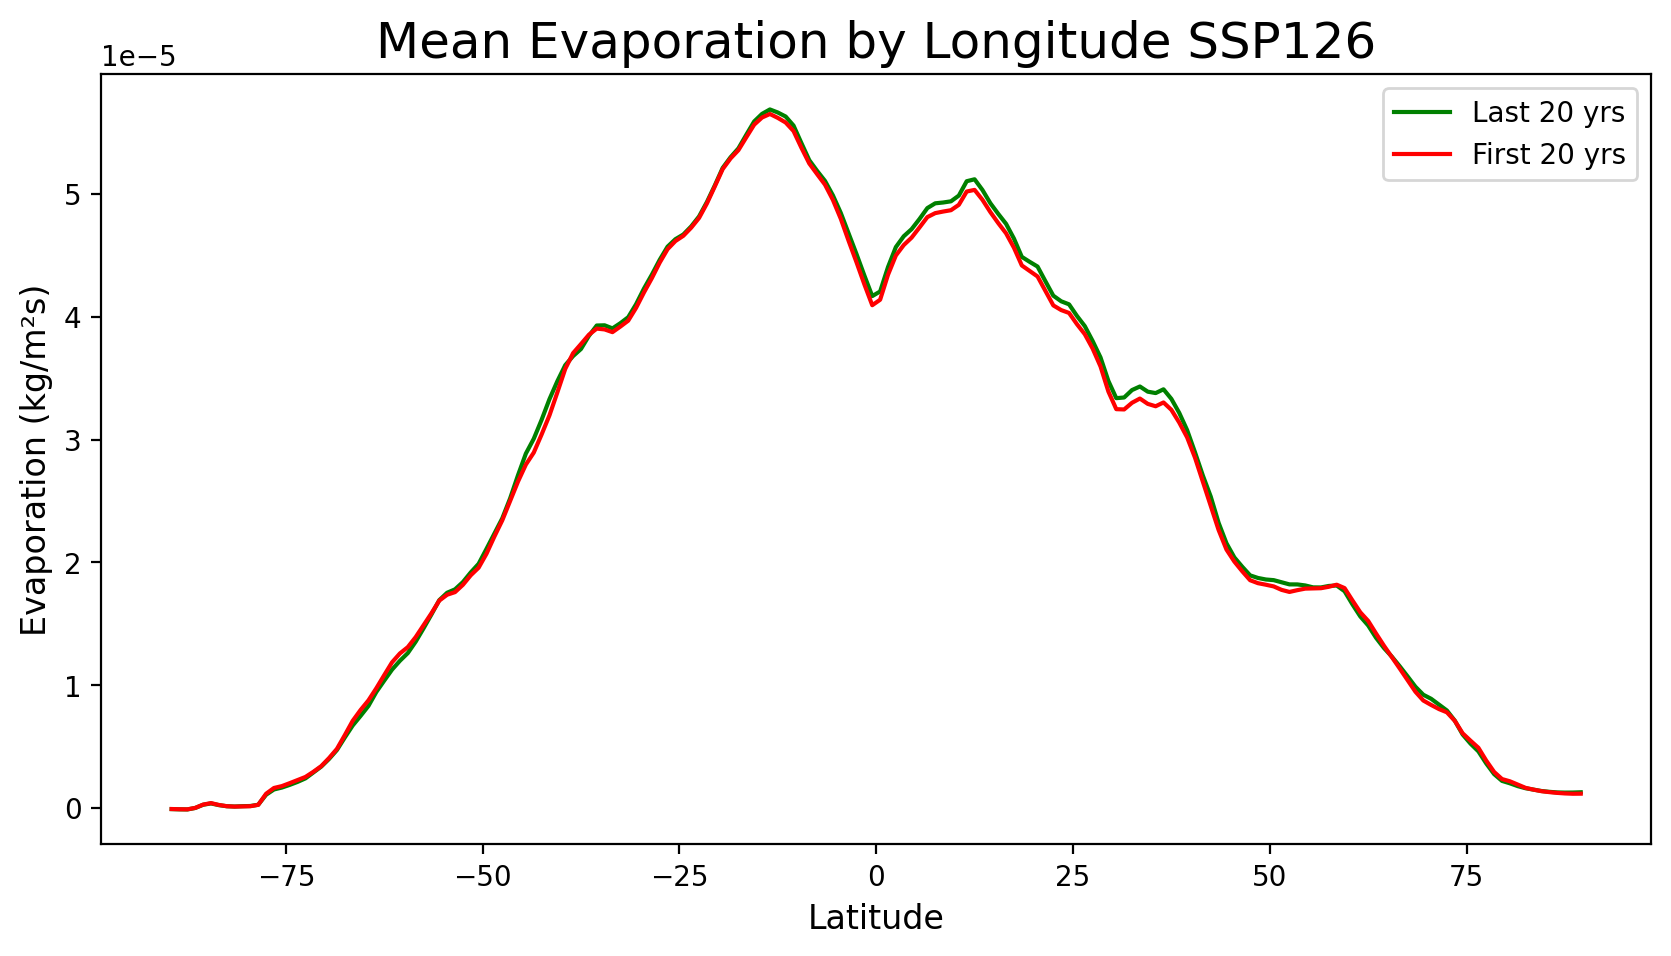

In [53]:
fig, ax = plt.subplots(figsize = (10,5))

avg_first_year_evap_126 = baseline_evap_last_years.mean(dim = 'longitude').plot(color = 'green', label='Last 20 yrs')
avg_last_year_evap_126 = baseline_evap_first_years.mean(dim = 'longitude').plot(color = 'red', label='First 20 yrs')
# Adding figure titles
ax.set_title('Mean Evaporation by Longitude SSP126', fontsize = 18)

# Adding axis titles/legends
ax.set_ylabel('Evaporation (kg/m²s)', fontsize = 12)
ax.set_xlabel('Latitude', fontsize = 12)
ax.legend()

__Figure 12.__ Average evaporation by Longitude from SSP126.

## Evaporation including sublimination and transpiration 585

In [57]:
evap_ssp585_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'evspsbl' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)
evap_585_zarr = evap_ssp585_data.zstore.values[-1]
# create a mutable-mapping-style interface to the store
mapper_585_evap = gcs.get_mapper(evap_585_zarr)
# open the dataset using xarray and zarr
gfdl_esm4_585_evap = xr.open_zarr(mapper_585_evap, 
                                consolidated=True,use_cftime=True).evspsbl.rename({'lat':'latitude',
                                                             'lon':'longitude'})

## SSP585 Evaporation Graphs

In [58]:
baseline_evap_first_years_585 = gfdl_esm4_585_evap.sel(time=slice('2015-01-16', '2035-01-01')).mean(dim='time')
baseline_evap_last_years_585 = gfdl_esm4_585_evap.sel(time=slice('2080-12-16', '2100-12-16')).mean(dim='time')

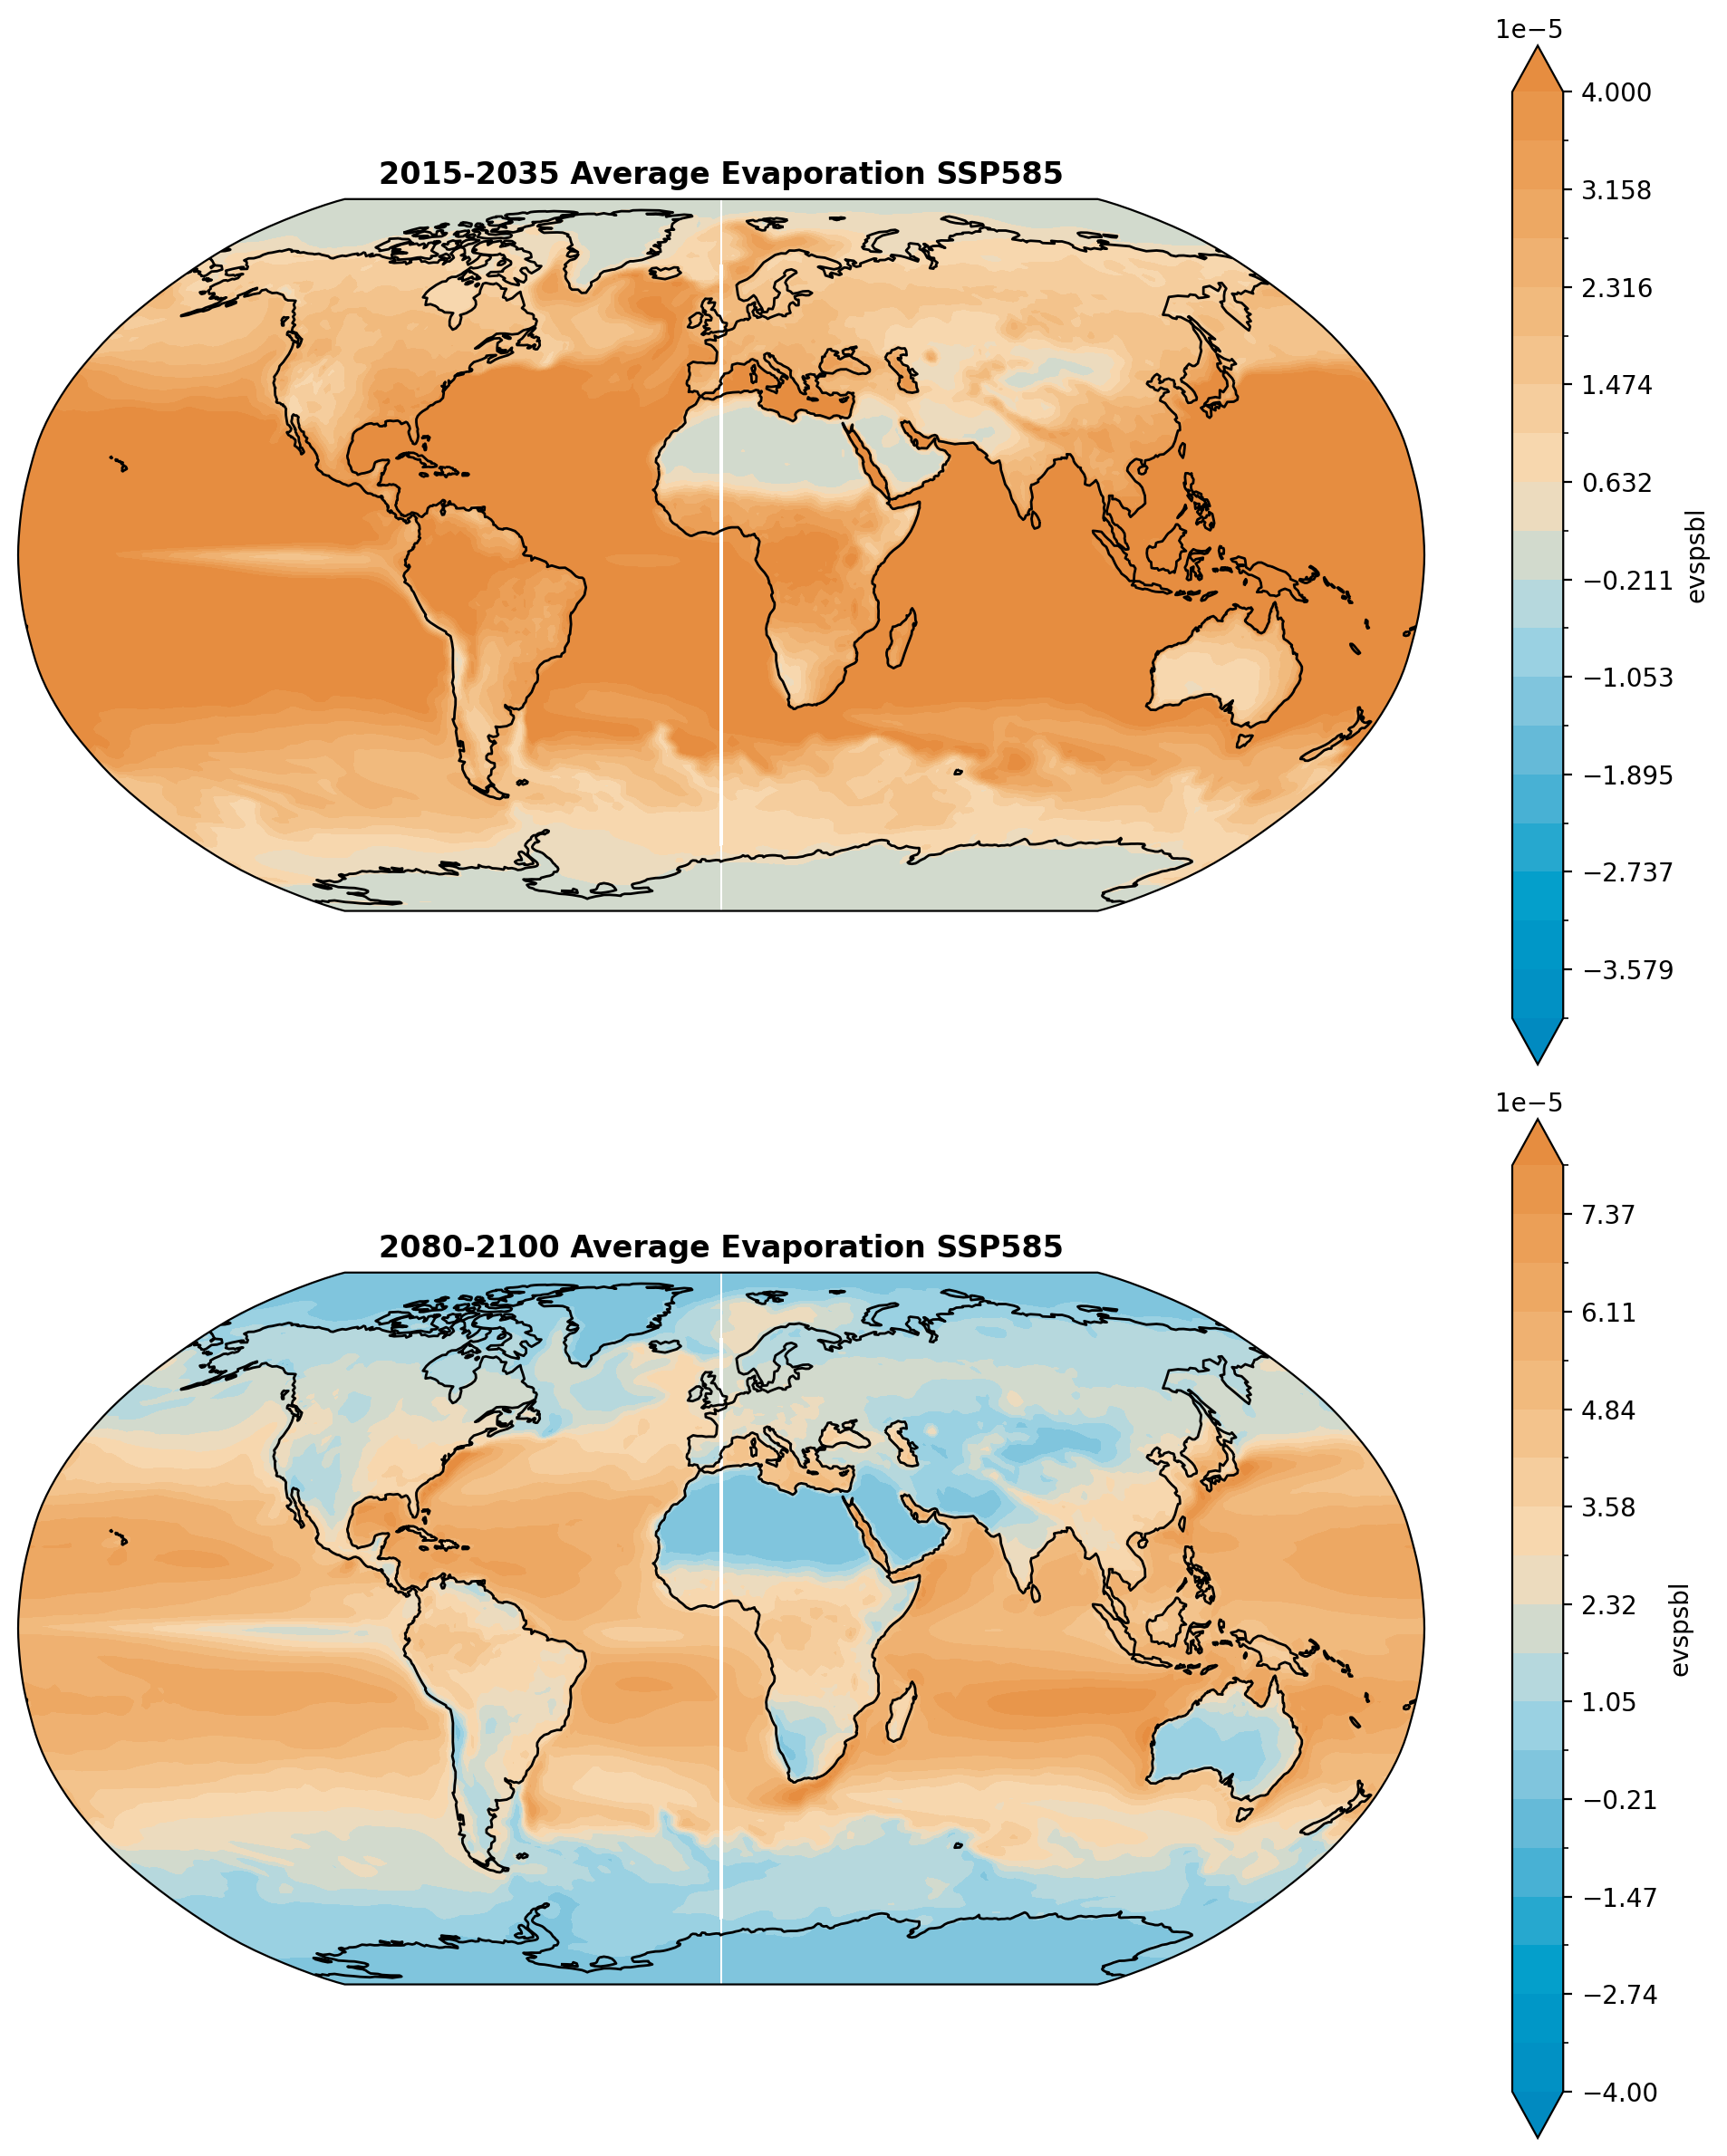

In [59]:
subplot_kws=dict(projection=ccrs.Robinson())

### set up our figure settings
fig, (ax1,ax2) = plt.subplots(ncols=1,
                               nrows=2,
                               figsize=(10,12),
                               subplot_kw=subplot_kws) ## set up our plotting area

### plot our data
baseline_evap_first_years_585.plot.contourf(ax=ax1, cmap=wocemaps.salinity,  vmin=-0.00004, vmax=0.00004, levels=20, extend='both',
                                transform=ccrs.PlateCarree())
baseline_evap_last_years_585.plot.contourf(ax=ax2, cmap=wocemaps.salinity, vmin=-0.00004, vmax=0.00008, levels=20, extend='both',
                                transform=ccrs.PlateCarree())


## customize our subplots
ax1.set_title("2015-2035 Average Evaporation SSP585", fontweight='bold')
ax2.set_title('2080-2100 Average Evaporation SSP585', fontweight='bold')

ax1.set_ylabel('Latitude', fontsize = 15)
ax1.set_xlabel('Longitude', fontsize = 15)

ax2.set_ylabel('Latitude', fontsize = 15)
ax2.set_xlabel('Longitude', fontsize = 15)

plt.tight_layout() ## make it look nicely spaced!

### add some coastlines
ax1.coastlines()
ax2.coastlines()



__Figure 13.__ 2015-2035 Average evaporation including transpiration and sublimination from scenario SSP585 (top graph), 2080-2100 Average Evaporation including transpiration and sublimination (bottom graph)

In [64]:
difference_evap_585 = baseline_evap_last_years_585 - baseline_evap_first_years_585

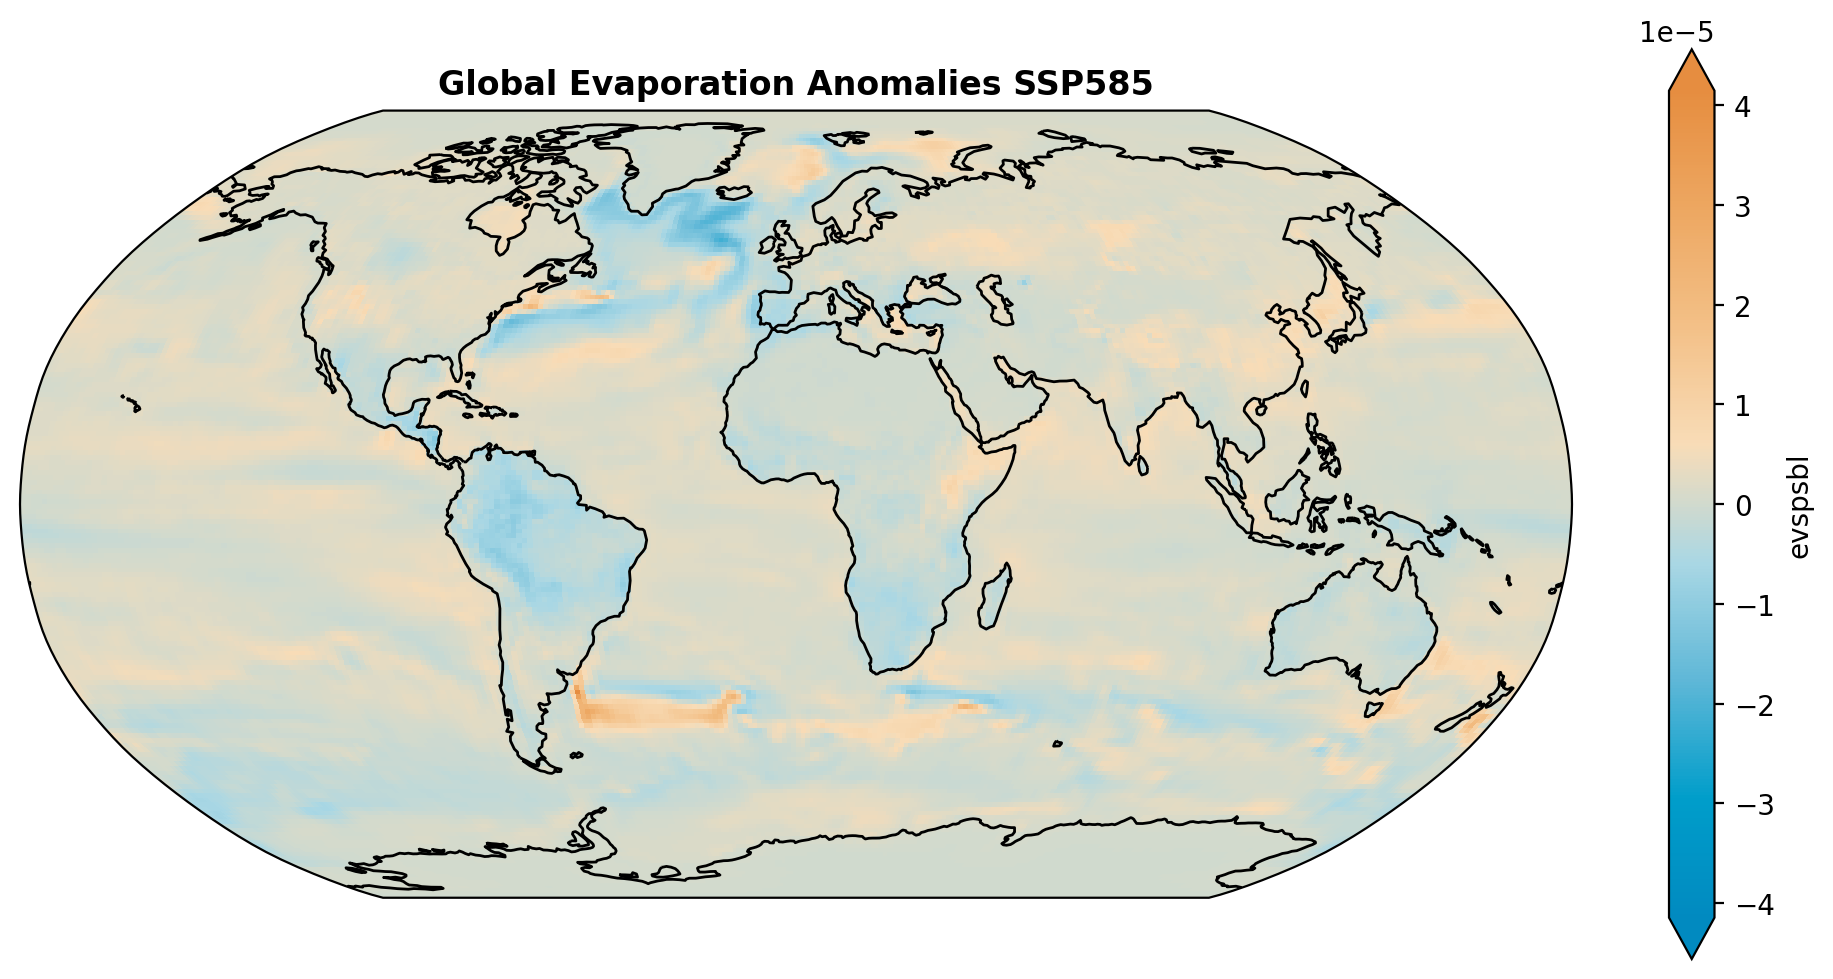

In [65]:
subplot_kws=dict(projection=ccrs.Robinson())

### set up our figure settings
fig, (ax1) = plt.subplots(ncols=1,
                               nrows=1,
                               figsize=(10,5),
                               subplot_kw=subplot_kws) ## set up our plotting area

### plot our data
difference_evap_585.plot(ax=ax1, cmap=wocemaps.salinity,extend='both',
                                transform=ccrs.PlateCarree())

## customize our subplots
ax1.set_title("Global Evaporation Anomalies SSP585", fontweight='bold')

ax1.set_ylabel('Latitude', fontsize = 15)
ax1.set_xlabel('Longitude', fontsize = 15)

plt.tight_layout() ## make it look nicely spaced!

### add some coastlines
ax1.coastlines()


__Figure 11.__ Average evaporation including transpiration and sublimination anomalies from scenario SSP585

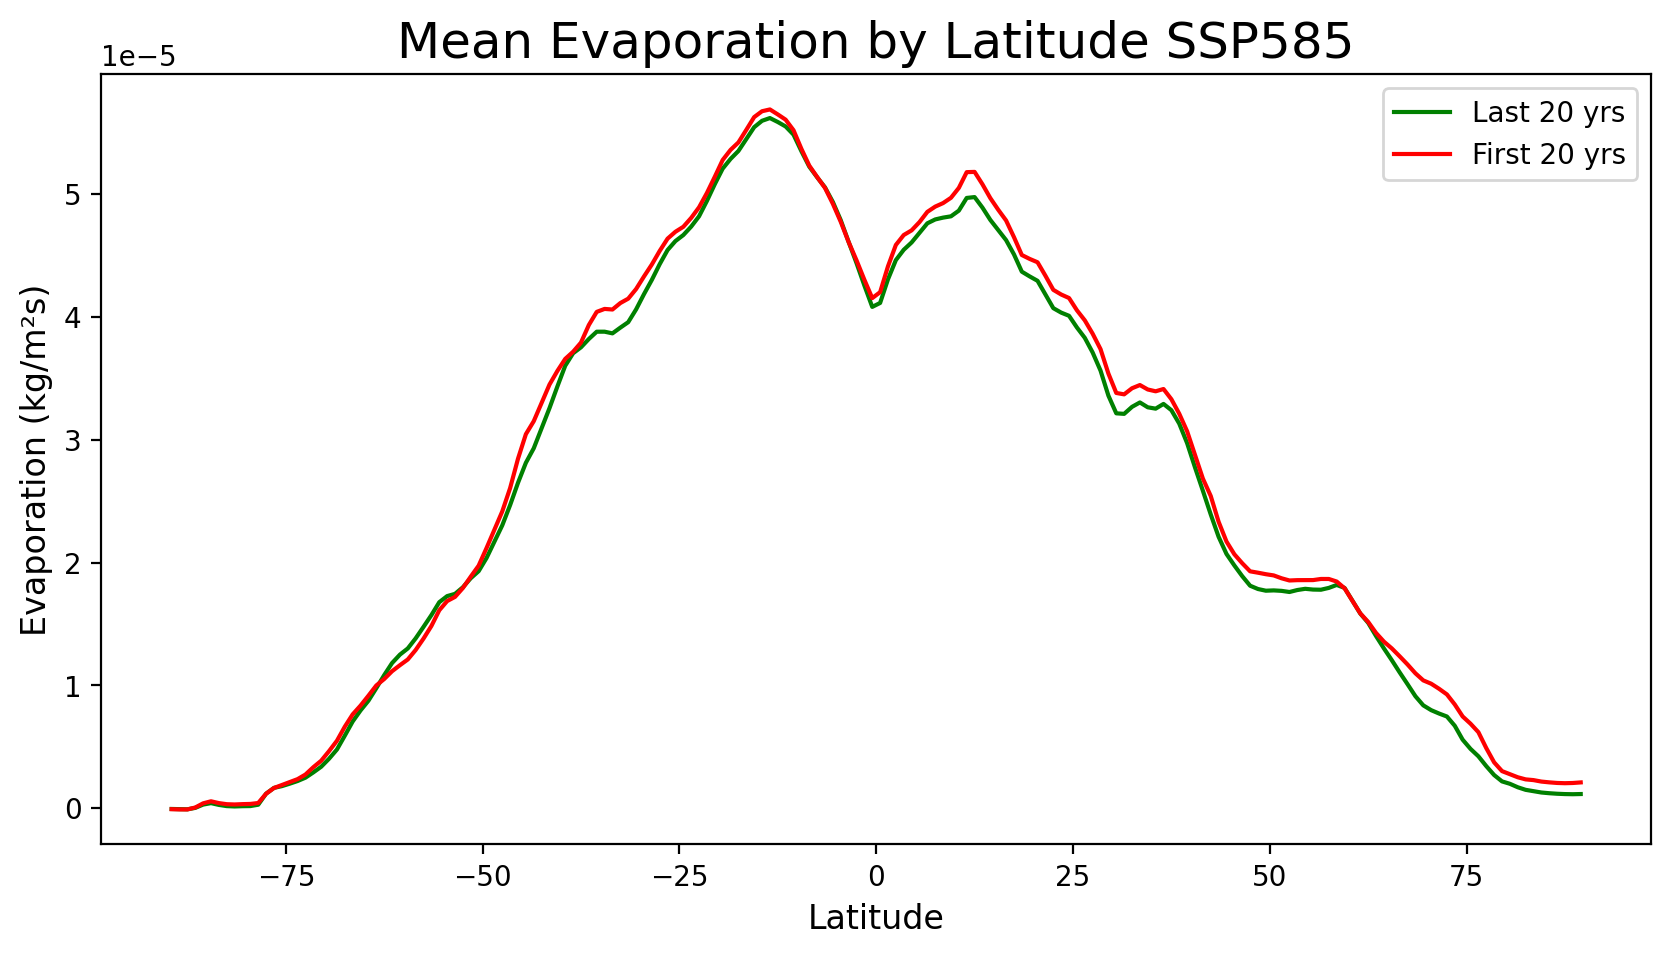

In [66]:
fig, ax = plt.subplots(figsize = (10,5))

avg_first_year_evap_585 = baseline_evap_last_years_585.mean(dim = 'longitude')
avg_last_year_evap_585 = baseline_evap_first_years_585.mean(dim = 'longitude')
avg_last_year_evap_585.plot(color='green', label='Last 20 yrs')
avg_first_year_evap_585.plot(color='red', label='First 20 yrs')

ax.set_title('Mean Evaporation by Latitude SSP585', fontsize = 18)

# Adding axis titles/legends
ax.set_ylabel('Evaporation (kg/m²s)', fontsize = 12)
ax.set_xlabel('Latitude', fontsize = 12)
ax.legend()

__Figure 12.__ Average evaporation by longitude from scenario SSP585

## Snow fall flux 585

In [67]:
snow_ssp585_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'prsn' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)
snow_585_zarr = snow_ssp585_data.zstore.values[-1]
# create a mutable-mapping-style interface to the store
mapper_585_snow = gcs.get_mapper(snow_585_zarr)
# open the dataset using xarray and zarr
gfdl_esm4_585_snow = xr.open_zarr(mapper_585_snow, 
                                consolidated=True,use_cftime=True).prsn.rename({'lat':'latitude',
                                                             'lon':'longitude'})

## Snow fall flux 126

In [68]:
snow_ssp126_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'prsn' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)
snow_126_zarr = snow_ssp126_data.zstore.values[-1]
# create a mutable-mapping-style interface to the store
mapper_126_snow = gcs.get_mapper(snow_126_zarr)
# open the dataset using xarray and zarr
gfdl_esm4_126_snow = xr.open_zarr(mapper_126_snow, 
                                consolidated=True,use_cftime=True).prsn.rename({'lat':'latitude',
                                                             'lon':'longitude'})